I recommend to view the file at

# PREDICTING COVID-19 MORTALITY

# [1- Introduction](#1)

# [2- Loading basic libraries](#2)

# [3- Data frame loading and cleaning](#3)

 - ## [A- Data loading and selection columns](#3.A)
 - ## [B- Treatment of variables](#3.B)
     - ### [B.1- Categoricals variables](#3.B.1)
     - ### [B.2- Datetime variables](#3.B.2)
     - ### [B.3- Calculating Age](#3.B.3)
     - ### [B.4- n_comor and n_sym columns creation](#3.B.4)
 - ## [C- Filtered](#3.C)
 - ## [D- At last](#3.D)

# [4- Data analysis](#4)
 - ## [A- Gender](#4.A)
     - ### [A.1- Sub-analysis Cured/Death](#4.A.1)
     - ### [A.2- Sub-analysis Age by Gender](#4.A.2)
     - ### [A.3- Sub-analysis Age by Hospitalized](#4.A.3)
     - ### [A.4- Sub-analysis Age by Evolution](#4.A.4)
 - ## [B- Tests](#4.B)
 - ## [C- Symptoms](#4.C)
 - ## [D- Symptoms](#4.D)
 - ## [E- Delta_DeathReg](#4.E)
 - ## [F- Hospitalized](#4.F)
 - ## [G- Pregnant](#4.G)
 - ## [H- Cases by date](#4.H)

<a id='1'></a>

---

# 1. Introduction

**HACER INTRODUCCION!!!**

<a id='2'></a>

---

# 2. Loading basic libraries

In [227]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

<a id='3'></a>

---

# 3. Data frame loading and cleaning

<a id='3.A'></a>

## 3.A Data loading and selection columns

In [317]:
df = pd.read_csv("MICRODADOS.csv", index_col = 0, encoding = "latin-1", sep = ";")

In [318]:
df.head(2)

,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
DataNotificacao,,,,,,,,,,,,,,,,,,,,,
2021-11-11,2021-11-11,2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2021-11-11,2021-11-11,2021-11-11,NaN,2021-11-11,NaN,NaN,2021-11-11,NaN,Descartados,Ignorado,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


In [319]:
df = df.reset_index().drop("DataNotificacao", axis = 1)
df.head(2)

,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-11-11,2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,-,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
1,2021-11-11,2021-11-11,NaN,2021-11-11,NaN,NaN,2021-11-11,NaN,Descartados,Ignorado,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


In [320]:
df.shape

(2209062, 44)

Observing with greater details the columns.

In [321]:
df.columns

Index(['DataCadastro', 'DataDiagnostico', 'DataColeta_RT_PCR',
       'DataColetaTesteRapido', 'DataColetaSorologia',
       'DataColetaSorologiaIGG', 'DataEncerramento', 'DataObito',
       'Classificacao', 'Evolucao', 'CriterioConfirmacao', 'StatusNotificacao',
       'Municipio', 'Bairro', 'FaixaEtaria', 'IdadeNaDataNotificacao', 'Sexo',
       'RacaCor', 'Escolaridade', 'Gestante', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade', 'FicouInternado', 'ViagemBrasil',
       'ViagemInternacional', 'ProfissionalSaude', 'PossuiDeficiencia',
       'MoradorDeRua', 'ResultadoRT_PCR', 'ResultadoTesteRapido',
       'ResultadoSorologia', 'ResultadoSorologia_IGG', 'TipoTesteRapido'],
      dtype='object')

In [322]:
df.iloc[:2, :15]

,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,Evolucao,CriterioConfirmacao,StatusNotificacao,Municipio,Bairro,FaixaEtaria
0,2021-11-11,2021-11-08,NaN,NaN,NaN,NaN,NaN,NaN,Suspeito,-,-,Em Aberto,SERRA,VALPARAÍSO,10 a 19 anos
1,2021-11-11,2021-11-11,NaN,2021-11-11,NaN,NaN,2021-11-11,NaN,Descartados,Ignorado,Laboratorial,Encerrado,VITORIA,PRAIA DO CANTO,60 a 69 anos


In [323]:
df.iloc[:2, 15:30]

,IdadeNaDataNotificacao,Sexo,RacaCor,Escolaridade,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal
0,"19 anos, 8 meses, 21 dias",M,Ignorado,Ignorado,Não se aplica,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não
1,"63 anos, 11 meses, 16 dias",F,Branca,Educação superior completa,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [324]:
df.iloc[:2, 30:]

,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
1,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


The most relevant columns are conserved to carry out the analysis.

In [325]:
covid_cols = ["DataCadastro", "DataDiagnostico", "DataObito", "ResultadoTesteRapido", "ResultadoRT_PCR",
              "Classificacao", "FicouInternado", "Evolucao",
              "Sexo", "IdadeNaDataNotificacao", "FaixaEtaria", "RacaCor",
              "Municipio", "Bairro", "Gestante", "PossuiDeficiencia",         
              "Febre", "DificuldadeRespiratoria", "Tosse", "Coriza", "DorGarganta", "Diarreia", "Cefaleia",
              "ComorbidadePulmao", "ComorbidadeCardio", "ComorbidadeRenal", "ComorbidadeDiabetes", "ComorbidadeTabagismo", "ComorbidadeObesidade"]

In [326]:
df = df[covid_cols] 

In [327]:
df.columns

Index(['DataCadastro', 'DataDiagnostico', 'DataObito', 'ResultadoTesteRapido',
       'ResultadoRT_PCR', 'Classificacao', 'FicouInternado', 'Evolucao',
       'Sexo', 'IdadeNaDataNotificacao', 'FaixaEtaria', 'RacaCor', 'Municipio',
       'Bairro', 'Gestante', 'PossuiDeficiencia', 'Febre',
       'DificuldadeRespiratoria', 'Tosse', 'Coriza', 'DorGarganta', 'Diarreia',
       'Cefaleia', 'ComorbidadePulmao', 'ComorbidadeCardio',
       'ComorbidadeRenal', 'ComorbidadeDiabetes', 'ComorbidadeTabagismo',
       'ComorbidadeObesidade'],
      dtype='object')

Column name translation.

In [328]:
df.columns = ["Register_date", "Diagnosis_date", "Death_date",
              "Result_PCR", "Result_RapidTest", "Classification", "Hospitalized", "Evolution", 
              "Gender", "Notification_age", "Range_age", "Race", "Municipality", "Neighborhood", 
              "Pregnant", "Disabled", "Fever", "Breath_difficulty", "Cough", "Rhinitis", "Throat_pain", 
              "Diarrhea", "Headache", "Comorbidity_pulmonary", "Comorbidity_cardiac", "Comorbidity_renal", 
              "Comorbidity_diabetes", "Comorbidity_smoking", "Comorbidity_obesity"]

In [329]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Municipality',
       'Neighborhood', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity'],
      dtype='object')

<a id='3.B'></a>

## 3.B Treatment of variables

Search for nulls

In [330]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

Death_date               0.992140
Neighborhood             0.011711
Register_date            0.000000
Fever                    0.000000
Comorbidity_smoking      0.000000
Comorbidity_diabetes     0.000000
Comorbidity_renal        0.000000
Comorbidity_cardiac      0.000000
Comorbidity_pulmonary    0.000000
Headache                 0.000000
Diarrhea                 0.000000
Throat_pain              0.000000
Rhinitis                 0.000000
Cough                    0.000000
Breath_difficulty        0.000000
Pregnant                 0.000000
Disabled                 0.000000
Diagnosis_date           0.000000
Municipality             0.000000
Race                     0.000000
Range_age                0.000000
Notification_age         0.000000
Gender                   0.000000
Evolution                0.000000
Hospitalized             0.000000
Classification           0.000000
Result_RapidTest         0.000000
Result_PCR               0.000000
Comorbidity_obesity      0.000000
dtype: float64

- `Death_date` appears to have 90% null data, this situation will be discussed later.

- Some columns seem to not have nulls directly, let's see the cause of this.

<a id='3.B.1'></a>

### 3.B.1 Categoricals variables

Printing each category of each categorical variable.

In [331]:
def categoricals(dataframe):
    for x in range(dataframe.shape[1]):
        if "date" in dataframe.columns[x]:
            pass
        else:
            print(dataframe.columns[x], "\n", dataframe[dataframe.columns[x]].unique(), "\n")

In [332]:
categoricals(df)

Result_PCR 
 ['Não Informado' 'Negativo' 'Positivo' 'Inconclusivo'] 

Result_RapidTest 
 ['Não Informado' 'Inconclusivo' 'Negativo' 'Positivo'] 

Classification 
 ['Suspeito' 'Descartados' 'Confirmados'] 

Hospitalized 
 ['Não Informado' 'Não' 'Ignorado' 'Sim'] 

Evolution 
 ['-' 'Ignorado' 'Cura' 'Óbito por outras causas' 'Óbito pelo COVID-19'] 

Gender 
 ['M' 'F' 'I'] 

Notification_age 
 ['19 anos, 8 meses, 21 dias' '63 anos, 11 meses, 16 dias'
 '35 anos, 5 meses, 26 dias' ... '94 anos, 7 meses, 7 dias'
 '99 anos, 7 meses, 26 dias' '97 anos, 2 meses, 2 dias'] 

Range_age 
 ['10 a 19 anos' '60 a 69 anos' '30 a 39 anos' '0 a 4 anos' '40 a 49 anos'
 '20 a 29 anos' '70 a 79 anos' '50 a 59 anos' '80 a 89 anos' '05 a 9 anos'
 '90 anos ou mais' '-'] 

Race 
 ['Ignorado' 'Branca' 'Parda' 'Preta' 'Amarela' 'Indigena'] 

Municipality 
 ['SERRA' 'VITORIA' 'VILA VELHA' ... 'MONTE ALEGRE DE SERGIPE'
 'FARIA LEMOS' 'VOLTA GRANDE'] 

Neighborhood 
 ['VALPARAÍSO' 'PRAIA DO CANTO' 'ARIBIRÍ' ... 'LOT

- Some columns present values expressed as `Não Informado`, `-`, `Ignorado`, etc. 

- These variables will be replaced by `np.nan`.

- Convert to `type = category` if is necessary.

In [333]:
uninformed_cols = ["Result_RapidTest", "Result_PCR", "Hospitalized", "Disabled"]
df[uninformed_cols] = df[uninformed_cols].replace({"Não Informado": np.nan, "Inconclusivo": np.nan, "Ignorado": np.nan}).astype("category")

In [334]:
symptoms_cols = ["Fever", "Breath_difficulty", "Cough", "Rhinitis", "Throat_pain", "Diarrhea", "Headache"]
df[symptoms_cols] = df[symptoms_cols].replace("-", np.nan).astype("category")

In [335]:
comorbidity_cols = ["Comorbidity_pulmonary", "Comorbidity_cardiac", "Comorbidity_renal", "Comorbidity_diabetes", "Comorbidity_smoking", "Comorbidity_obesity"]
df[comorbidity_cols] = df[comorbidity_cols].replace("-", np.nan).astype("category")

In [336]:
df["Evolution"] = df["Evolution"].replace({"-": np.nan, "Ignorado": np.nan})

In [337]:
df["Gender"] = df["Gender"].replace("I", np.nan)

In [338]:
df["Race"] = df["Race"].replace("Ignorado", np.nan).astype("category")

In [339]:
dict_pregnant = {"Ignorado": np.nan, 
                 "Não se aplica": np.nan, 
                 "1º trimeste": "Yes", 
                 "2º trimeste": "Yes", 
                 "3º trimeste": "Yes", 
                 "Idade gestacional ignorada": "Yes"}   
df["Pregnant"] = df["Pregnant"].replace(dict_pregnant).astype("category")

In [340]:
df[["Classification", "Range_age", "Municipality", "Neighborhood"]] = df[["Classification", "Range_age", "Municipality", "Neighborhood"]].astype("category")       

In [341]:
categoricals(df)

Result_PCR 
 [NaN, 'Negativo', 'Positivo']
Categories (2, object): ['Negativo', 'Positivo'] 

Result_RapidTest 
 [NaN, 'Negativo', 'Positivo']
Categories (2, object): ['Negativo', 'Positivo'] 

Classification 
 ['Suspeito', 'Descartados', 'Confirmados']
Categories (3, object): ['Confirmados', 'Descartados', 'Suspeito'] 

Hospitalized 
 [NaN, 'Não', 'Sim']
Categories (2, object): ['Não', 'Sim'] 

Evolution 
 [nan 'Cura' 'Óbito por outras causas' 'Óbito pelo COVID-19'] 

Gender 
 ['M' 'F' nan] 

Notification_age 
 ['19 anos, 8 meses, 21 dias' '63 anos, 11 meses, 16 dias'
 '35 anos, 5 meses, 26 dias' ... '94 anos, 7 meses, 7 dias'
 '99 anos, 7 meses, 26 dias' '97 anos, 2 meses, 2 dias'] 

Range_age 
 ['10 a 19 anos', '60 a 69 anos', '30 a 39 anos', '0 a 4 anos', '40 a 49 anos', ..., '50 a 59 anos', '80 a 89 anos', '05 a 9 anos', '90 anos ou mais', '-']
Length: 12
Categories (12, object): ['-', '0 a 4 anos', '05 a 9 anos', '10 a 19 anos', ..., '60 a 69 anos', '70 a 79 anos', '80 a 89 anos'

In [342]:
((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending = False)

Death_date               99.21
Evolution                72.34
Result_PCR               60.98
Hospitalized             60.07
Result_RapidTest         54.71
Pregnant                 46.15
Race                     25.40
Disabled                  1.38
Neighborhood              1.17
Comorbidity_obesity       0.12
Comorbidity_pulmonary     0.09
Comorbidity_smoking       0.09
Comorbidity_diabetes      0.09
Comorbidity_cardiac       0.09
Comorbidity_renal         0.08
Headache                  0.08
Rhinitis                  0.07
Fever                     0.07
Cough                     0.07
Throat_pain               0.07
Diarrhea                  0.07
Breath_difficulty         0.06
Gender                    0.03
Range_age                 0.00
Notification_age          0.00
Classification            0.00
Diagnosis_date            0.00
Municipality              0.00
Register_date             0.00
dtype: float64

- Eliminating those patients who have more or equal than 2 `comorbidities = np.nan`.

- Proceed in the same way with `symptoms`.

In [343]:
df = df.dropna(subset = comorbidity_cols, thresh = 5)

In [344]:
df = df.dropna(subset = symptoms_cols, thresh = 5)

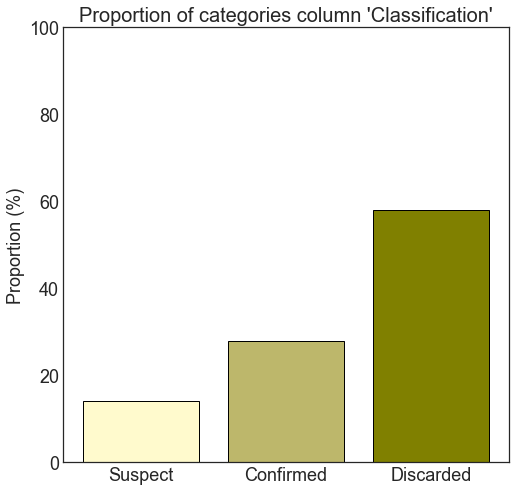

In [345]:
plt.style.use("seaborn-white")
sns.set_palette("vlag")
fig, ax = plt.subplots(figsize = (8, 8))

classification_porportions = df["Classification"].value_counts(normalize = True).sort_values().round(2) * 100

colors = ["lemonchiffon", "darkkhaki" ,"olive"]
ax.bar(classification_porportions.index, classification_porportions, color = colors,edgecolor = "black")

plt.xticks(ticks = ["Confirmados", "Descartados", "Suspeito"], labels = ["Confirmed", "Discarded", "Suspect"], fontsize = 18)
plt.ylabel("Proportion (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of categories column 'Classification'", fontsize = 20)
plt.ylim(0, 100)

plt.show()

In [346]:
df = df.dropna(subset = "Evolution")

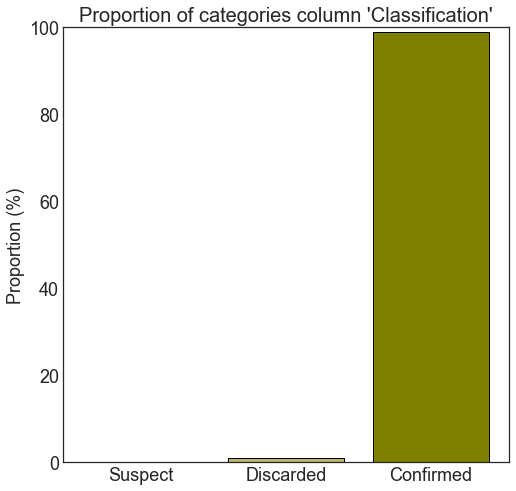

In [347]:
plt.style.use("seaborn-white")
sns.set_palette("vlag")
fig, ax = plt.subplots(figsize = (8, 8))

classification_porportions = df["Classification"].value_counts(normalize = True).sort_values().round(2) * 100

colors = ["lemonchiffon", "darkkhaki" ,"olive"]
ax.bar(classification_porportions.index, classification_porportions, color = colors,edgecolor = "black")

plt.ylabel("Proportion (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(ticks = ["Confirmados", "Descartados", "Suspeito"], labels = ["Confirmed", "Discarded", "Suspect"], fontsize = 18)
plt.title("Proportion of categories column 'Classification'", fontsize = 20)
plt.ylim(0, 100)

plt.show()

- It makes sense because only the evolution of patients who have positive covid is recorded. 
- Those that are suspected and discarded have no evolution.

In [348]:
((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending = False)

Death_date               97.18
Result_PCR               60.60
Hospitalized             55.21
Pregnant                 46.70
Result_RapidTest         43.64
Race                     24.27
Disabled                  1.18
Neighborhood              0.27
Comorbidity_obesity       0.04
Gender                    0.02
Throat_pain               0.01
Comorbidity_cardiac       0.01
Fever                     0.01
Comorbidity_pulmonary     0.01
Headache                  0.01
Notification_age          0.00
Comorbidity_smoking       0.00
Comorbidity_diabetes      0.00
Comorbidity_renal         0.00
Diarrhea                  0.00
Rhinitis                  0.00
Range_age                 0.00
Cough                     0.00
Breath_difficulty         0.00
Classification            0.00
Diagnosis_date            0.00
Evolution                 0.00
Municipality              0.00
Register_date             0.00
dtype: float64

Null treatment `pregnant`.

In [349]:
df["Gender"].unique()

array(['F', 'M', nan], dtype=object)

In [350]:
mask_M = df["Gender"] == "M"
mask_pregnant = df["Pregnant"] == "Yes"
df[mask_M  & mask_pregnant][["Gender", "Pregnant"]]

,Gender,Pregnant
200588,M,Yes
296973,M,Yes
1180319,M,Yes
1365060,M,Yes
1479271,M,Yes
1839551,M,Yes
1847128,M,Yes


Clearly there can be no pregnant men, it is replaced by `np.nan`.

In [351]:
df.loc[mask_M  & mask_pregnant, "Pregnant"] = np.nan

In [352]:
mask_M = df["Gender"] == "M"
mask_pregnant = df["Pregnant"] == "Yes"
df[mask_M  & mask_pregnant][["Gender", "Pregnant"]]

,Gender,Pregnant


Let's see how many nulls there are in the female sex.

In [353]:
mask_F = df["Gender"] == "F"
mask_pregnant_null = df["Pregnant"].isna()

df[mask_F & mask_pregnant_null]

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Rhinitis,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity
35372,2021-10-29,2021-10-15,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"35 anos, 1 meses, 25 dias",...,Sim,Sim,Não,Não,Não,Não,Não,Não,Não,Não
36357,2021-10-29,2021-10-25,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"33 anos, 11 meses, 6 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
37937,2021-10-29,2021-10-25,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"42 anos, 9 meses, 1 dias",...,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não
43179,2021-10-27,2021-10-24,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"38 anos, 9 meses, 30 dias",...,Sim,Não,Sim,Não,Não,Não,Não,Não,Não,Não
54585,2021-10-25,2021-10-22,NaN,Positivo,NaN,Confirmados,NaN,Cura,F,"41 anos, 5 meses, 25 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207644,2020-04-01,2020-03-29,NaN,Positivo,Positivo,Confirmados,Não,Cura,F,"42 anos, 0 meses, 10 dias",...,Sim,Não,Não,Não,Não,Não,Não,Não,Não,Não
2207728,2020-04-01,2020-03-22,NaN,NaN,Positivo,Confirmados,Não,Cura,F,"60 anos, 4 meses, 13 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não
2207755,2020-04-01,2020-03-17,NaN,NaN,Positivo,Confirmados,Não,Cura,F,"38 anos, 2 meses, 18 dias",...,Sim,Sim,Não,Sim,Não,Não,Não,Não,Não,Não
2207778,2020-03-31,2020-03-30,2020-04-28,NaN,Negativo,Descartados,Sim,Óbito por outras causas,F,"88 anos, 10 meses, 17 dias",...,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [354]:
pregnant_null_abs = df[mask_F & mask_pregnant_null].shape[0]
pregnant_null_pct = np.round((df[mask_F & mask_pregnant_null].shape[0] / df.shape[0] * 100), 2)
print(f"When the 'pregnant' column is selected there are only {pregnant_null_abs} ({pregnant_null_pct}%) nulls.")

When the 'pregnant' column is selected there are only 2576 (0.42%) nulls.


Let's see what happens to the nulls in `Death_date`.

In [355]:
df_covid_evolution = df[["Evolution", "Death_date"]]
df_covid_evolution.head(2)

,Evolution,Death_date
1440,Cura,NaN
2233,Cura,NaN


In [356]:
mask_death_covid = df_covid_evolution["Evolution"] == "Óbito pelo COVID-19" # Death because Covid-19
mask_death_others = df_covid_evolution["Evolution"] == "Óbito por outras causas" # Death beacuse other circumstances

df_covid_death = df_covid_evolution[mask_death_covid | mask_death_others]
df_covid_death.shape

(17260, 2)

In [357]:
df_covid_death["Death_date"].isna().sum()

86

`death_date` only has 86 nulls, the rest are nulls because the patients did not die.

- Although `Result_PCR` and  `Result_RapidTest` have a high proportion of nulls, we will only use these columns for a brief isolated description later.
- The translation into English of the variables is carried out.

In [358]:
df[["Result_PCR", "Result_RapidTest"]] = df[["Result_PCR", "Result_RapidTest"]].replace({"Positivo": "Positive", "Negativo": "Negative"}) 

In [359]:
df[symptoms_cols] = df[symptoms_cols].replace({"Não": "No", "Sim": "Yes"})

In [360]:
df[comorbidity_cols] = df[comorbidity_cols].replace({"Não": "No", "Sim": "Yes"})

In [361]:
df["Hospitalized"] = df["Hospitalized"].replace({"Não": "No", "Sim": "Yes"})

In [362]:
df["Classification"] = df["Classification"].replace({"Confirmados": "Confirmed", "Descartados": "Discarded", "Suspeito": "Suspect"})

In [363]:
df["Evolution"] = df["Evolution"].replace({"Cura": "Cured", "Óbito por outras causas": "Death", "Óbito pelo COVID-19": "Death"})

In [364]:
df["Gender"] = df["Gender"].replace({"M": "Masculine", "F": "Femenine"})

In [365]:
df["Race"] = df["Race"].replace({"Parda": "Brown", "Branca": "White", "Preta": "Black", "Amarela": "Yellow", "Indigena": "Indigenous"})

In [366]:
df["Pregnant"] = df["Pregnant"].replace({"Não": "No"})

In [367]:
df["Disabled"] = df["Disabled"].replace({"Não": "No", "Sim": "Yes"})

<a id='3.B.2'></a>

### 3.B.2 Datetime variables

In [368]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Municipality',
       'Neighborhood', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity'],
      dtype='object')

In [369]:
date_data = ["Diagnosis_date", "Register_date", "Death_date"]

for i in date_data:
    df[i] = pd.to_datetime(df[i])

In [370]:
df.dtypes

Register_date            datetime64[ns]
Diagnosis_date           datetime64[ns]
Death_date               datetime64[ns]
Result_PCR                     category
Result_RapidTest               category
Classification                 category
Hospitalized                   category
Evolution                        object
Gender                           object
Notification_age                 object
Range_age                      category
Race                           category
Municipality                   category
Neighborhood                   category
Pregnant                       category
Disabled                       category
Fever                          category
Breath_difficulty              category
Cough                          category
Rhinitis                       category
Throat_pain                    category
Diarrhea                       category
Headache                       category
Comorbidity_pulmonary          category
Comorbidity_cardiac            category


Cases where `df["Diagnosis_date"] > df["Register_date"]` should be removed because the registration date is always after the diagnosis date.

In [371]:
mask_Diag_great_Reg = df["Diagnosis_date"] > df["Register_date"]
df = df[~mask_Diag_great_Reg]

Proceed to calculate `df["Register_date"] - df["Diagnosis_date"]`.

In [372]:
df["Delta_RegDiag"] = (df["Register_date"] - df["Diagnosis_date"]).dt.days
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,Yes,No,No,No,No,No,No,1
2233,2021-11-10,2021-09-17,NaT,NaN,Positive,Confirmed,NaN,Cured,Masculine,"33 anos, 1 meses, 3 dias",...,No,No,Yes,No,No,No,No,No,No,54
2546,2021-11-10,2020-12-28,NaT,NaN,Positive,Confirmed,No,Cured,Masculine,"63 anos, 5 meses, 10 dias",...,Yes,No,No,No,No,Yes,No,No,No,317
2725,2021-11-10,2021-01-02,NaT,NaN,Positive,Confirmed,No,Cured,Masculine,"38 anos, 4 meses, 15 dias",...,No,No,No,No,No,No,No,No,No,312
2758,2021-11-10,2021-09-16,NaT,NaN,Positive,Confirmed,NaN,Cured,Masculine,"36 anos, 7 meses, 30 dias",...,Yes,No,Yes,No,No,No,No,No,No,55


Those patients with a delta `> 7 days` are eliminated.

In [373]:
mask_Delta_RegDiag = df["Delta_RegDiag"] > 7
df = df[~mask_Delta_RegDiag]
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,Yes,No,No,No,No,No,No,1
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,Yes,Yes,No,No,No,No,No,No,2
3155,2021-11-02,2021-10-29,NaT,Positive,Positive,Confirmed,No,Cured,Masculine,"77 anos, 0 meses, 15 dias",...,No,Yes,No,No,No,No,No,No,No,4
4727,2021-11-10,2021-11-05,2019-11-10,NaN,Negative,Discarded,Yes,Death,Masculine,"47 anos, 3 meses, 25 dias",...,No,No,No,No,No,No,No,No,No,5
6785,2021-11-09,2021-11-02,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"33 anos, 5 meses, 12 dias",...,Yes,No,Yes,No,No,No,No,No,No,7


The same goes for the `Death_date` column which cannot be less than `Register_date`.

In [374]:
mask_Death_less_Reg = df["Death_date"] < df["Register_date"]
df = df[~mask_Death_less_Reg]
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Throat_pain,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,Yes,No,No,No,No,No,No,1
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,Yes,Yes,No,No,No,No,No,No,2
3155,2021-11-02,2021-10-29,NaT,Positive,Positive,Confirmed,No,Cured,Masculine,"77 anos, 0 meses, 15 dias",...,No,Yes,No,No,No,No,No,No,No,4
6785,2021-11-09,2021-11-02,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"33 anos, 5 meses, 12 dias",...,Yes,No,Yes,No,No,No,No,No,No,7
7372,2021-11-09,2021-11-09,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"59 anos, 1 meses, 11 dias",...,No,No,No,No,No,No,No,No,No,0


Proceed to calculate `df["Death_date"] - df["Register_date"]`.

In [375]:
df["Delta_DeathReg"] = (df["Death_date"] - df["Register_date"]).dt.days
df.head()

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Diarrhea,Headache,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,Yes,Yes,No,No,No,No,No,No,1,NaN
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,Yes,Yes,No,No,No,No,No,No,2,NaN
3155,2021-11-02,2021-10-29,NaT,Positive,Positive,Confirmed,No,Cured,Masculine,"77 anos, 0 meses, 15 dias",...,Yes,No,No,No,No,No,No,No,4,NaN
6785,2021-11-09,2021-11-02,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"33 anos, 5 meses, 12 dias",...,No,Yes,No,No,No,No,No,No,7,NaN
7372,2021-11-09,2021-11-09,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"59 anos, 1 meses, 11 dias",...,No,No,No,No,No,No,No,No,0,NaN


<a id='3.B.3'></a>

### 3.B.3 Calculating Age

<a id='3.C'></a>

In [376]:
# Function to obtain the age of the column "Notification_age"

def getnumber(text):
    words = text.split()
    return words[0]

In [377]:
df["Age"] = df.apply(lambda x: getnumber(x.Notification_age), axis=1)
df["Age"] = df["Age"].astype(int)

Checking for nulls in `Age` column.

In [378]:
df["Age"].isna().sum()

0

In [379]:
df["Age"].describe()

count    459201.000000
mean         39.833983
std          17.521825
min          -1.000000
25%          27.000000
50%          38.000000
75%          51.000000
max         121.000000
Name: Age, dtype: float64

`df["Age"] < 0` are observed, they will be taken into account as null data to be replaced by the median of the population as appropriate by sex.

In [380]:
mask_age_below_0 = df["Age"] < 0
df.loc[mask_age_below_0, "Age"] = np.nan

In [381]:
df["Age"].isna().sum()

14

In [382]:
mask_F = df["Gender"] == "Femenine"
mask_age_null = df["Age"].isna()

df.loc[mask_F & mask_age_null, "Age"] = df.loc[mask_F, "Age"].median()

In [383]:
mask_M = df["Gender"] == "Masculine"
mask_age_null = df["Age"].isna()

df.loc[mask_M & mask_age_null, "Age"] = df.loc[mask_M, "Age"].median()

In [384]:
df["Age"].isna().sum()

0

- There are no nulls in `Age`.
- `df["Age"] >= 18` are selected.

In [385]:
mask_adult = df["Age"] >= 18
df = df[mask_adult]

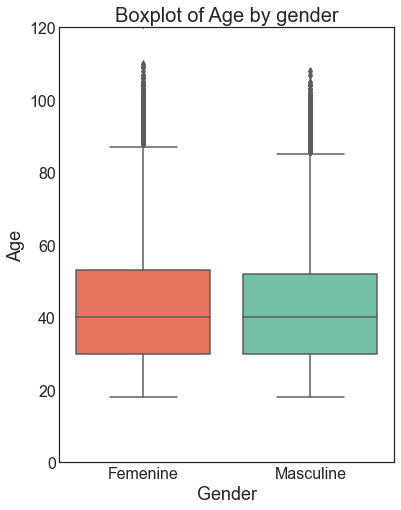

In [386]:
fig, ax = plt.subplots(figsize = (6,8))

plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Gender", y = "Age", data = df)

plt.title("Boxplot of Age by gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.show()

Outliers are removed.

In [387]:
iqr_age = iqr(df["Age"])
low_thres_age = np.quantile(df["Age"], 0.25) - (1.5 * iqr_age)
high_thres_age = np.quantile(df["Age"], 0.75) + (1.5 * iqr_age)

In [388]:
df = df[(df["Age"] >= low_thres_age) & (df["Age"] <= high_thres_age)]

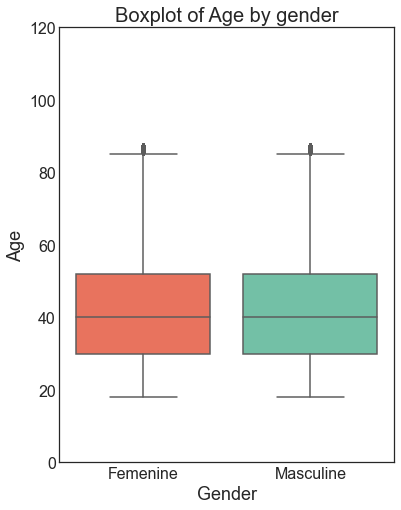

In [389]:
fig, ax = plt.subplots(figsize = (6,8))

plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Gender", y = "Age", data = df)

plt.title("Boxplot of Age by gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.show()

<a id='3.B.4'></a>

### 3.B.4 n_comor and n_sym columns creation

In [390]:
df["n_comor"] = df[comorbidity_cols].replace({"Yes": 1, "No": 0}).fillna(0).astype("int").sum(axis = 1)
df.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Comorbidity_pulmonary,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,No,No,No,No,No,No,1,NaN,39.0,0
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,No,No,No,No,No,2,NaN,24.0,0


In [391]:
df["n_symp"] = df[symptoms_cols].replace({"Yes": 1, "No": 0}).fillna(0).astype("int").sum(axis = 1)
df.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor,n_symp
1440,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,No,No,No,No,No,1,NaN,39.0,0,6
3082,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,No,No,No,No,2,NaN,24.0,0,4


<a id='3.C'></a>

### 3.C Filtered

In [392]:
mask_confirmed = df["Classification"] == "Confirmed"
df = df[mask_confirmed]

- A confirmed patient is considered if it has a positive test. Otherwise it is discarded.
- First, those patients who were confirmed by Covid will be searched for but do not have any tests to support it.

In [393]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Municipality',
       'Neighborhood', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [394]:
mask_PCR_not_positive = (df["Result_PCR"] == "Negative") | (df["Result_PCR"].isna())
mask_RapidTest_not_positive = (df["Result_RapidTest"] == "Negative") | (df["Result_RapidTest"].isna())
mask_not_positive = mask_PCR_not_positive & mask_RapidTest_not_positive
df[mask_not_positive].shape

(29622, 34)

- There are 29622 that do not have any test that supports the confirmation of covid.

- These are removed from the analysis.

In [395]:
df = df[~mask_not_positive]
df.shape

(384498, 34)

In [396]:
df = df.reset_index().drop("index", axis = 1)

In [397]:
((df.isnull().sum() / df.shape[0]) * 100).round(2).sort_values(ascending = False)

Death_date               98.00
Delta_DeathReg           98.00
Result_PCR               59.77
Hospitalized             53.62
Pregnant                 46.41
Result_RapidTest         35.38
Race                     21.39
Disabled                  1.17
Neighborhood              0.22
Comorbidity_obesity       0.05
Gender                    0.02
Comorbidity_cardiac       0.01
Fever                     0.01
Comorbidity_pulmonary     0.01
Headache                  0.00
Delta_RegDiag             0.00
Age                       0.00
Comorbidity_smoking       0.00
Comorbidity_diabetes      0.00
Comorbidity_renal         0.00
n_comor                   0.00
Register_date             0.00
Breath_difficulty         0.00
Diarrhea                  0.00
Throat_pain               0.00
Rhinitis                  0.00
Cough                     0.00
Diagnosis_date            0.00
Municipality              0.00
Range_age                 0.00
Notification_age          0.00
Evolution                 0.00
Classifi

<a id='3.D'></a>

### 3.D At last

In [398]:
df_death = df[df["Evolution"] == "Death"]

In [399]:
df_death["Hospitalized"].isna().sum() / df_death.shape[0] * 100

28.14044213263979

In [400]:
df.to_csv("df.csv", encoding = "latin-1")

<a id='4'></a>

# 4. Analysis

In [559]:
df_covid = pd.read_csv("df.csv", encoding = "latin-1", index_col = 0, parse_dates = ["Register_date", "Diagnosis_date", "Death_date"])
df_covid.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor,n_symp
0,2021-11-11,2021-11-10,NaT,Positive,NaN,Confirmed,NaN,Cured,Femenine,"39 anos, 1 meses, 13 dias",...,No,No,No,No,No,1,NaN,39.0,0,6
1,2021-11-10,2021-11-08,NaT,Positive,NaN,Confirmed,No,Cured,Masculine,"24 anos, 0 meses, 28 dias",...,No,No,No,No,No,2,NaN,24.0,0,4


In [560]:
df_covid.shape

(384498, 34)

<a id='4.A'></a>

## 4.A Gender

In [561]:
gender_abs = df_covid["Gender"].value_counts().sort_values()
gender_pct = df_covid["Gender"].value_counts(normalize = True).sort_values().round(2) * 100

In [562]:
gender_pct

Masculine    46.0
Femenine     54.0
Name: Gender, dtype: float64

In [563]:
def addlabels_abs(a, b):
    for i in range(len(a)):
        plt.text(a.index[i], b[i] + 0.5, '{:,}'.format(a[i]), ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

In [564]:
def addlabels_pct(x):
    for i in range(len(x)):
        plt.text(x.index[i], x[i] / 2, x[i].round(2).astype("str") + "%", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

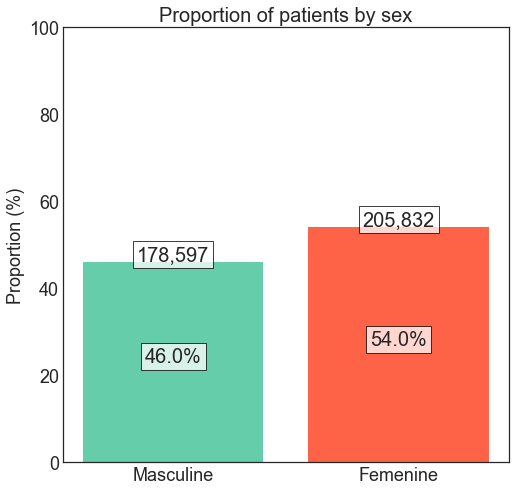

In [565]:
plt.style.use("seaborn-white")
sns.set_palette("vlag")
fig, ax = plt.subplots(figsize = (8, 8))

colors = ["mediumaquamarine", "tomato"]
ax.bar(gender_pct.index, gender_pct, color = colors)

plt.ylabel("Proportion (%)", fontsize = 18)
plt.yticks(fontsize = 18)
plt.xticks(ticks = ["Masculine", "Femenine"], labels = ["Masculine", "Femenine"], fontsize = 18)
plt.title("Proportion of patients by sex", fontsize = 20)
plt.ylim(0, 100)

addlabels_abs(gender_abs, gender_pct)
addlabels_pct(gender_pct)

plt.show()

VER SI HAY DIFERENCIAS SIGNIFICATIVAS!

<a id='4.A.1'></a>

### 4.A.1 Sub-analysis Cured/Death

A dataframe `Evolution = Death` is created:

In [566]:
mask_live = df_covid["Evolution"] == "Cured"
df_covid_death = df_covid[~mask_live]
df_covid_death.shape

(7690, 34)

In [567]:
gender_abs_death = df_covid_death["Gender"].value_counts().sort_values(ascending = False)
gender_pct_death = df_covid_death["Gender"].value_counts(normalize = True).round(2) * 100

In [568]:
gender_pct_death

Masculine    56.0
Femenine     44.0
Name: Gender, dtype: float64

A dataframe `Evolution = Cured` is created:

In [569]:
mask_live = df_covid["Evolution"] == "Cured"
df_covid_live = df_covid[mask_live]
df_covid_live.shape

(376808, 34)

In [570]:
gender_abs_live = df_covid_live["Gender"].value_counts().sort_values()
gender_pct_live = df_covid_live["Gender"].value_counts(normalize = True).sort_values().round(2) * 100

In [571]:
def addlabels_abs_ax(a, b, n):
    for i in range(len(a)):
        ax[n].text(a.index[i], b[i] + 0.5, '{:,}'.format(a[i]), ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

In [572]:
def addlabels_pct_ax(x, n):
    for i in range(len(x)):
        ax[n].text(x.index[i], x[i] / 2, x[i].round(2).astype("str") + "%", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

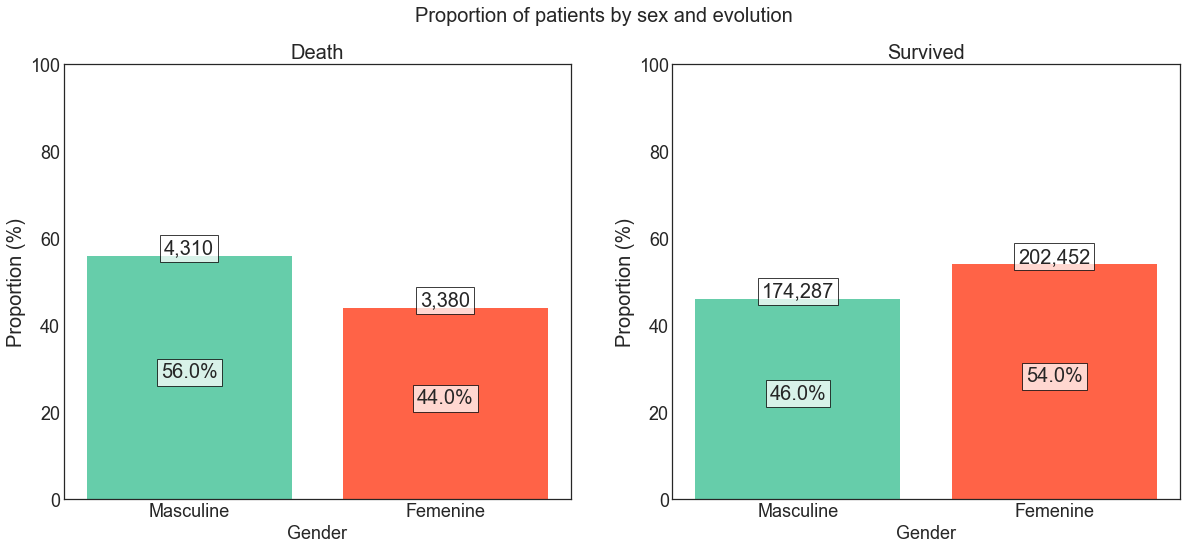

In [573]:
sns.set_palette("vlag")
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphs
colors = ["mediumaquamarine", "tomato"]
ax[0].bar(gender_pct_death.index, gender_pct_death, color = colors)
ax[1].bar(gender_pct_live.index, gender_pct_live, color = colors)

# Title, labels, ticks for ax[0]
ax[0].set_ylabel("Proportion (%)", fontsize = 20)
ax[0].set_xlabel("Gender", fontsize = 18)
ax[0].set_xticks(ticks = ["Masculine", "Femenine"], labels = ["Masculine", "Femenine"], fontsize = 18)
ax[0].set_yticks(ticks = np.arange(0, 120, 20), labels = np.arange(0, 120, 20), fontsize = 18)
ax[0].set_title("Death", fontsize = 20)
ax[0].set_ylim((0, 100))

addlabels_abs_ax(gender_abs_death, gender_pct_death, 0)
addlabels_pct_ax(gender_pct_death, 0)

# Title, labels, ticks for ax[1]
ax[1].set_ylabel("Proportion (%)", fontsize = 20)
ax[1].set_xlabel("Gender", fontsize = 18)
ax[1].set_xticks(ticks = ["Masculine", "Femenine"], labels = ["Masculine", "Femenine"], fontsize = 18)
ax[1].set_yticks(ticks = np.arange(0, 120, 20), labels = np.arange(0, 120, 20), fontsize = 18)
ax[1].set_title("Survived", fontsize = 20)
ax[1].set_ylim((0, 100))

addlabels_abs_ax(gender_abs_live, gender_pct_live, 1)
addlabels_pct_ax(gender_pct_live, 1)

plt.suptitle("Proportion of patients by sex and evolution", fontsize = 20)

plt.show()

The ratio changes and more men die than women despite having more women in the dataframe.

<a id='4.A.2'></a>

### 4.A.2 Sub-analysis Age by Gender

In [574]:
mask_M = df_covid["Gender"] == "Masculine"
masculine = df_covid[mask_M]

mask_F = df_covid["Gender"] == "Femenine"
femenine = df_covid[mask_F]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_5692\1111184816.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(labels = yticks, fontsize = 16)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5692\1111184816.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels = xticks, fontsize = 16)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5692\1111184816.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels = [0,20,40,60,80,100], fontsize = 14)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5692\1111184816.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels = yticks, fontsize = 16)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_5692\1111184816.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels = xticks, fontsize = 1

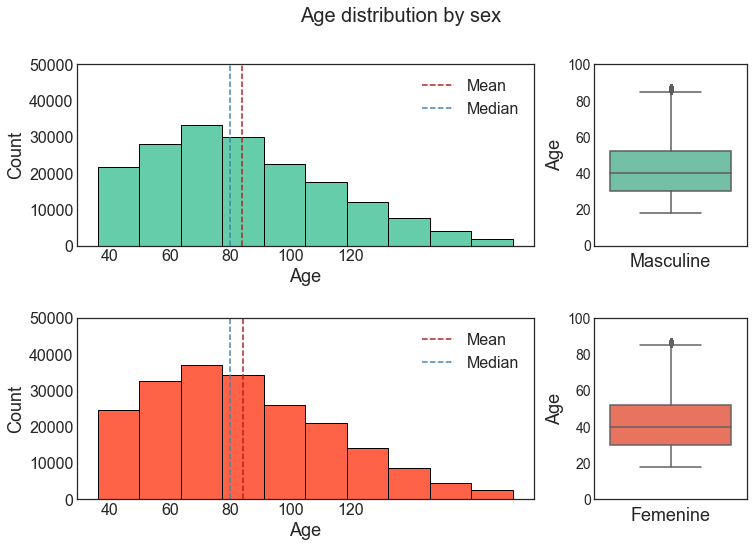

In [575]:
plt.style.use("seaborn-white")
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
 
spec = gridspec.GridSpec(ncols = 2, nrows = 2, width_ratios = [3, 1], wspace = 0.2, hspace = 0.4)

#Histogram masculine
ax0 = fig.add_subplot(spec[0,0])
ax0.hist(masculine["Age"], color = "mediumaquamarine", edgecolor = "black") 

ax0.set_xlabel("Age", fontsize = 18) 
ax0.set_ylabel("Count", fontsize = 18) 
yticks = list(range(0, 90000, 10000))
ax0.set_yticklabels(labels = yticks, fontsize = 16) 
xticks = list(range(20, 140, 20))
ax0.set_xticklabels(labels = xticks, fontsize = 16) 
ax0.set_ylim(0, 50000)

ax0.axvline(x = masculine["Age"].mean(), color = "firebrick", linestyle = "--", label = "Mean")
ax0.axvline(x = masculine["Age"].median(), color = "steelblue", linestyle = "--", label = "Median")
ax0.legend(fontsize = 16)

# Boxplot masculine
ax1 = fig.add_subplot(spec[0,1])
ax1 = sns.boxplot(x = "Gender", y = "Age", data = masculine, color = "mediumaquamarine") 

ax1.set_ylabel("Age", fontsize = 18)
ax1.set_xlabel("Masculine", fontsize = 18)
ax1.set_xticklabels([""])
ax1.set_yticklabels(labels = [0,20,40,60,80,100], fontsize = 14) 
ax1.set_ylim(0, 100)

#Histogram femenine
ax2 = fig.add_subplot(spec[1,0])
ax2.hist(femenine["Age"], color = "tomato", edgecolor = "black") 

ax2.set_xlabel("Age", fontsize = 18) 
ax2.set_ylabel("Count", fontsize = 18) 
yticks = list(range(0, 90000, 10000))
ax2.set_yticklabels(labels = yticks, fontsize = 16) 
xticks = list(range(20, 140, 20))
ax2.set_xticklabels(labels = xticks, fontsize = 16) 
ax2.set_ylim(0, 50000)

ax2.axvline(x = femenine["Age"].mean(), color = "firebrick", linestyle = "--", label = "Mean")
ax2.axvline(x = femenine["Age"].median(), color = "steelblue", linestyle = "--", label = "Median")
ax2.legend(fontsize = 16)

# Boxplot femenine
ax3 = fig.add_subplot(spec[1,1])
ax3 = sns.boxplot(x = "Gender", y = "Age", data = femenine, color = "tomato") 

ax3.set_ylabel("Age", fontsize = 18)
ax3.set_xlabel("Femenine", fontsize = 18)
ax3.set_xticklabels([""])
ax3.set_yticklabels(labels = [0,20,40,60,80,100], fontsize = 14) 
ax3.set_ylim(0, 100)

plt.suptitle("Age distribution by sex", fontsize = 20)

plt.show()

<a id='4.A.3'></a>

### 4.A.2 Sub-analysis Age by Hospitalized

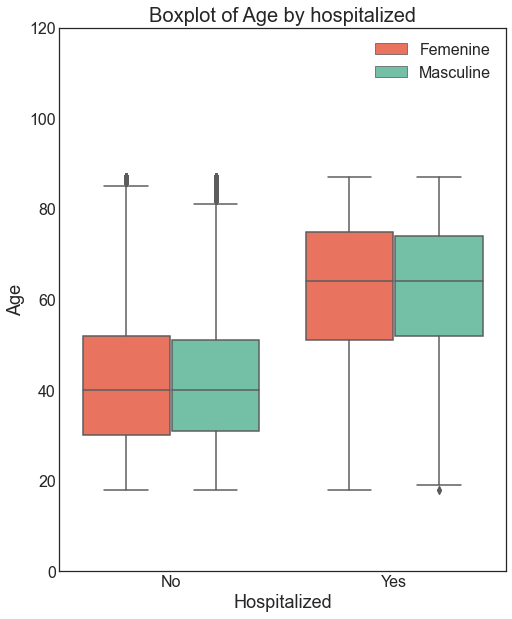

In [576]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Hospitalized", y = "Age", data = df_covid, hue = "Gender")

plt.title("Boxplot of Age by hospitalized", fontsize = 20)
plt.xlabel("Hospitalized", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.legend(fontsize = 16)

plt.show()

Hospitalized patients were older without differences between gender.

<a id='4.A.4'></a>

### 4.A.2 Sub-analysis Age by Evolution

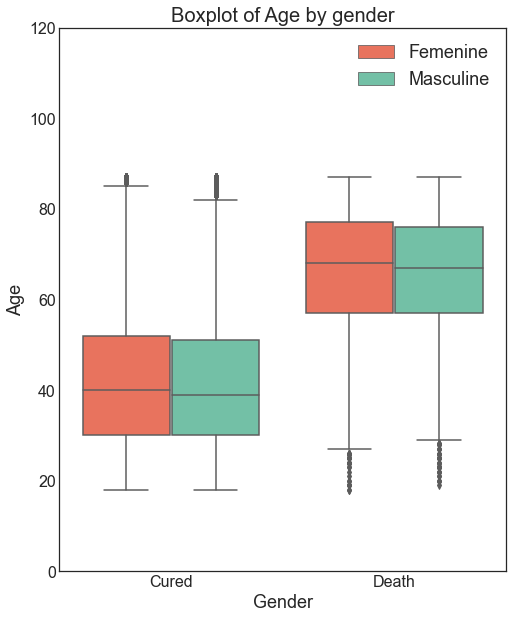

In [577]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")
colours = ["#ff6347", "#66CDAA"]
sns.set_palette(sns.color_palette(colours))

sns.boxplot(x = "Evolution", y = "Age", data = df_covid, hue = "Gender")

plt.title("Boxplot of Age by gender", fontsize = 20)
plt.xlabel("Gender", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 120)

plt.legend(fontsize = 18)

plt.show()

Patients who died were older without differences between gender.

<a id='4.B'></a>

## 4.B Tests

In [578]:
df_covid.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Municipality',
       'Neighborhood', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

It is common for rapid tests to be negative and PCR positive.

In [579]:
df_covid_tests = df_covid[["Result_RapidTest", "Result_PCR", "Classification"]]
print("Shape:", df_covid_tests.shape)
df_covid_tests.head(2)

Shape: (384498, 3)


,Result_RapidTest,Result_PCR,Classification
0,NaN,Positive,Confirmed
1,NaN,Positive,Confirmed


In [580]:
df_covid_tests.isna().sum()

Result_RapidTest    136047
Result_PCR          229800
Classification           0
dtype: int64

In [581]:
mask_testrapido_null = df_covid_tests["Result_RapidTest"].isna()
mask_PCR_null = df_covid_tests["Result_PCR"].isna()

pct_at_least_null = round((df_covid_tests[mask_testrapido_null | mask_PCR_null].shape[0] / df_covid_tests.shape[0] * 100), 2)
print(f"percentage of patients who have at least one of the two tests as null: {pct_at_least_null}%")

percentage of patients who have at least one of the two tests as null: 95.15%


In [582]:
df_covid_tests_without_na = df_covid_tests.dropna()

In [583]:
df_covid_tests_without_na.shape

(18651, 3)

In [584]:
mask_testrapido_positive = df_covid_tests_without_na["Result_RapidTest"] == "Positive"
mask_PCR_negative = df_covid_tests_without_na["Result_PCR"] == "Negative"

print("Number of patients with positive Result_RapidTest and negative Result_PCR:", df_covid_tests_without_na[mask_testrapido_positive & mask_PCR_negative].shape[0])
print("Percentage of patients with positive Result_RapidTest and negative Result_PCR:", round((df_covid_tests_without_na[mask_testrapido_positive & mask_PCR_negative].shape[0] / df_covid_tests_without_na.shape[0] * 100), 2), "%")

Number of patients with positive Result_RapidTest and negative Result_PCR: 7954
Percentage of patients with positive Result_RapidTest and negative Result_PCR: 42.65 %


Summarizing:

- 95% of the patients had at least one of the two tests as null data

- Of the remaining 5%, 42% had a positive rapid test and a negative PCR, something that is noteworthy

<a id='4.C'></a>

## 4.C Symptoms

In [585]:
df_covid.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Municipality',
       'Neighborhood', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [586]:
symptoms_pro = np.round((df_covid["n_symp"].value_counts().sort_index() / df_covid.shape[0]) * 100, 2)
symptoms_pro

0    15.23
1    12.18
2    23.51
3    23.94
4    15.36
5     7.15
6     2.24
7     0.38
Name: n_symp, dtype: float64

- Almost half of the patients have between 2 and 3 symptoms.
- 15% of patients do not have any symptoms.

Creation of the dataframe to graph.

In [587]:
symptoms_pro2 = df_covid.groupby("n_symp")[["n_symp"]].count() / df_covid.shape[0] * 100
symptoms_pro2.columns = ["Percentage"]
symptoms_pro2 = symptoms_pro2.sort_values(by = "Percentage", ascending = True).round(2)
symptoms_pro2  

,Percentage
n_symp,
7,0.38
6,2.24
5,7.15
1,12.18
0,15.23
4,15.36
2,23.51
3,23.94


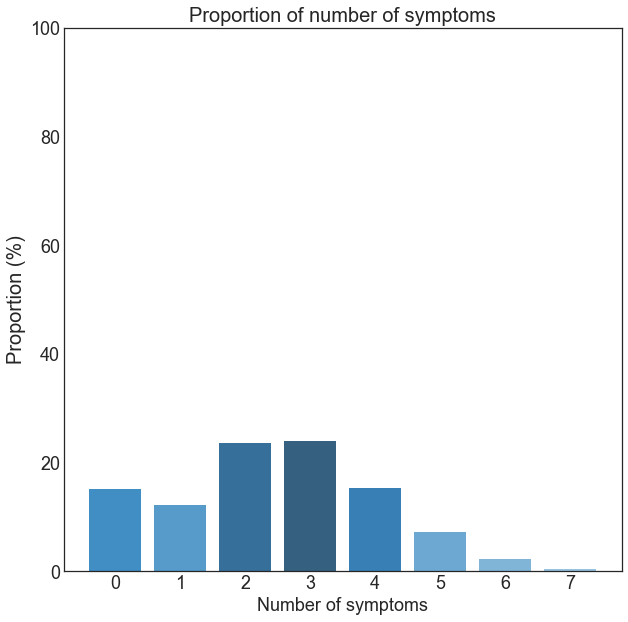

In [588]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(symptoms_pro2.index, symptoms_pro2["Percentage"], color = sns.color_palette("Blues_d", 10))

plt.ylabel("Proportion (%)", fontsize = 20)
plt.xlabel("Number of symptoms", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of number of symptoms", fontsize = 20)
plt.ylim(0, 100)

plt.show()

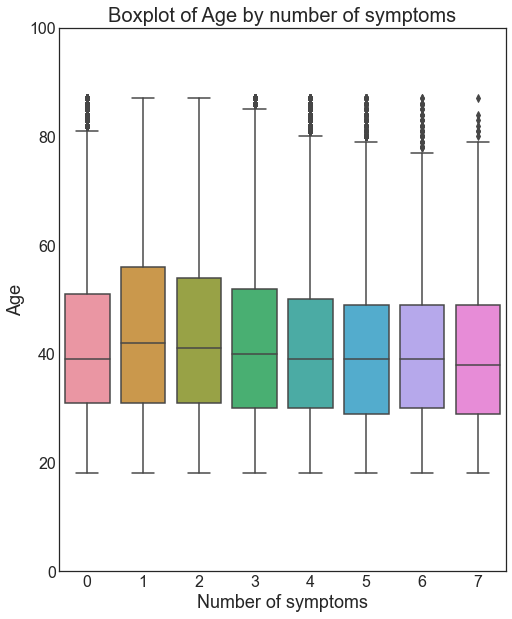

In [589]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")

sns.boxplot(x = "n_symp", y = "Age", data = df_covid)

plt.title("Boxplot of Age by number of symptoms", fontsize = 20)
plt.xlabel("Number of symptoms", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.show()

Creation of the data frame to graph for the patients who survived.

In [590]:
symptoms_pro2_live = df_covid_live.groupby("n_symp")[["n_symp"]].count() / df_covid_live.shape[0] * 100
symptoms_pro2_live.columns = ["Percentage"]
symptoms_pro2_live = symptoms_pro2_live.sort_values(by = "Percentage", ascending = True).round(2)
symptoms_pro2_live  

,Percentage
n_symp,
7,0.38
6,2.24
5,7.18
1,12.03
0,15.37
4,15.42
2,23.42
3,23.95


Creation of the data frame to graph for patients who died.

In [591]:
symptoms_pro2_death = df_covid_death.groupby("n_symp")[["n_symp"]].count() / df_covid_death.shape[0] * 100
symptoms_pro2_death.columns = ["Percentage"]
symptoms_pro2_death = symptoms_pro2_death.sort_values(by = "Percentage", ascending = True).round(2)
symptoms_pro2_death  

,Percentage
n_symp,
7,0.29
6,2.09
5,5.70
0,8.26
4,12.48
1,19.66
3,23.51
2,28.01


Comparative chart.

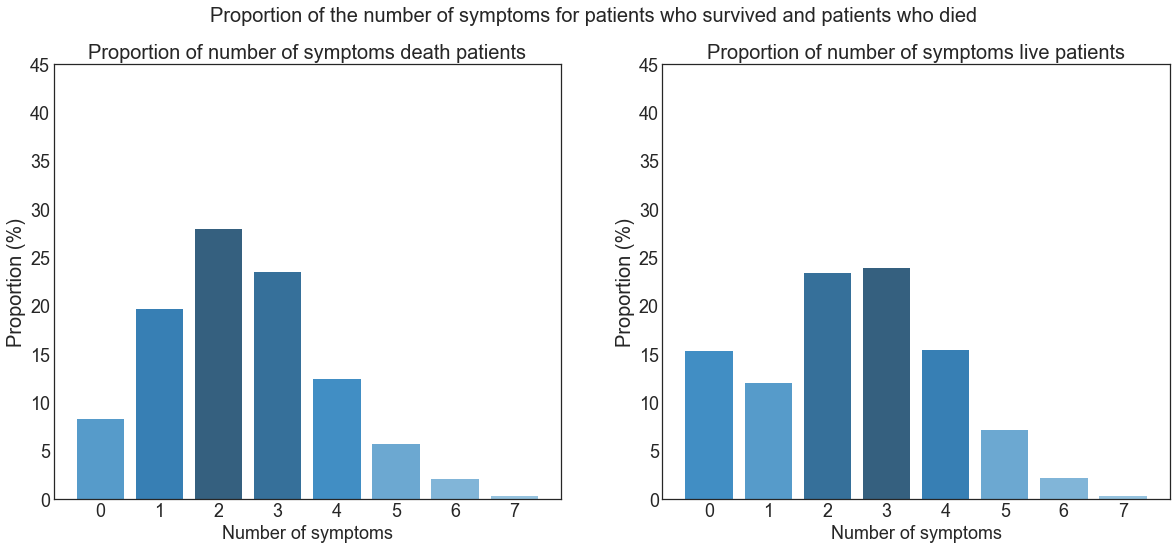

In [592]:
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphics
ax[0].bar(symptoms_pro2_death.index, symptoms_pro2_death["Percentage"], color = sns.color_palette("Blues_d", 10))
ax[1].bar(symptoms_pro2_live.index, symptoms_pro2_live["Percentage"], color = sns.color_palette("Blues_d", 10))

# Title, labels, ticks for ax[0]
ax[0].set_ylabel("Proportion (%)", fontsize = 20)
ax[0].set_xlabel("Number of symptoms", fontsize = 18)
ax[0].set_xticks(ticks = np.arange(0,8), labels = np.arange(0,8), fontsize = 18)
ax[0].set_yticks(ticks = np.arange(0,50, 5), labels = np.arange(0,50, 5), fontsize = 18)
ax[0].set_title("Proportion of number of symptoms death patients", fontsize = 20)
#ax[0].set_ylim((0, 210))

# Title, labels, ticks for ax[1]
ax[1].set_ylabel("Proportion (%)", fontsize = 20)
ax[1].set_xlabel("Number of symptoms", fontsize = 18)
ax[1].set_xticks(ticks = np.arange(0,8), labels = np.arange(0,8), fontsize = 18)
ax[1].set_yticks(ticks = np.arange(0,50, 5), labels = np.arange(0,50, 5), fontsize = 18)
ax[1].set_title("Proportion of number of symptoms live patients", fontsize = 20)
#ax[0].set_ylim((0, 210))

plt.suptitle("Proportion of the number of symptoms for patients who survived and patients who died", fontsize = 20)

plt.show()

<a id='4.D'></a>

## 4.D Comorbidities

In [593]:
n_comor_pro = np.round((df_covid["n_comor"].value_counts().sort_index() / df_covid.shape[0]) * 100, 2)
n_comor_pro

0    80.92
1    13.91
2     4.38
3     0.71
4     0.07
5     0.01
6     0.00
Name: n_comor, dtype: float64

It is noteworthy that 81% of patients do not have any comorbidity, perhaps because the patients are young.

Creation of the dataframe to graph.

In [594]:
n_comor_pro2 = df_covid.groupby("n_comor")[["n_comor"]].count() / df_covid.shape[0] * 100
n_comor_pro2.columns = ["Percentage"]
n_comor_pro2 = n_comor_pro2.sort_values(by = "Percentage", ascending = True).round(2)
n_comor_pro2 

,Percentage
n_comor,
6,0.00
5,0.01
4,0.07
3,0.71
2,4.38
1,13.91
0,80.92


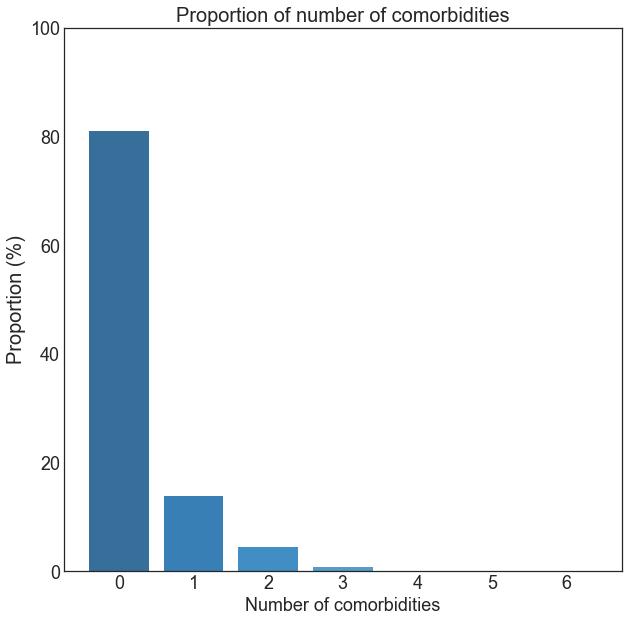

In [595]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (10, 10))

ax.bar(n_comor_pro2.index, n_comor_pro2["Percentage"], color = sns.color_palette("Blues_d", 10))

plt.ylabel("Proportion (%)", fontsize = 20)
plt.xlabel("Number of comorbidities", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of number of comorbidities", fontsize = 20)
plt.ylim(0, 100)

plt.show()

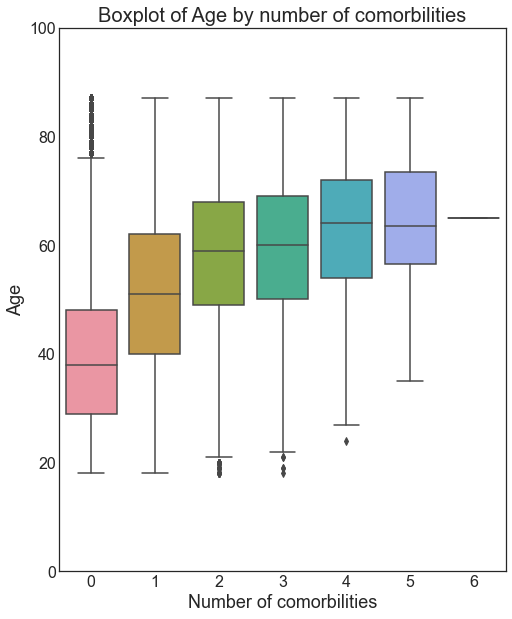

In [596]:
fig, ax = plt.subplots(figsize = (8,10))
plt.style.use("seaborn-white")
#palette = ["#d6e885", "purple"]

sns.boxplot(x = "n_comor", y = "Age", data = df_covid)

plt.title("Boxplot of Age by number of comorbilities", fontsize = 20)
plt.xlabel("Number of comorbilities", fontsize = 18)
plt.xticks(fontsize = 16)
plt.ylabel("Age", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.show()

As patients get older they have more comorbidities.

Creation of the data frame to graph for patients who survived.

In [597]:
comor_pro2_live = df_covid_live.groupby("n_comor")[["n_comor"]].count() / df_covid_live.shape[0] * 100
comor_pro2_live.columns = ["Percentage"]
comor_pro2_live = comor_pro2_live.sort_values(by = "Percentage", ascending = True).round(2)
comor_pro2_live  

,Percentage
n_comor,
6,0.00
5,0.01
4,0.05
3,0.55
2,3.98
1,13.62
0,81.80


Creation of the data frame to graph for patients who died.

In [598]:
comor_pro2_death = df_covid_death.groupby("n_comor")[["n_comor"]].count() / df_covid_death.shape[0] * 100
comor_pro2_death.columns = ["Percentage"]
comor_pro2_death = comor_pro2_death.sort_values(by = "Percentage", ascending = True).round(2)
comor_pro2_death  

,Percentage
n_comor,
5,0.21
4,1.38
3,8.41
2,23.90
1,28.15
0,37.95


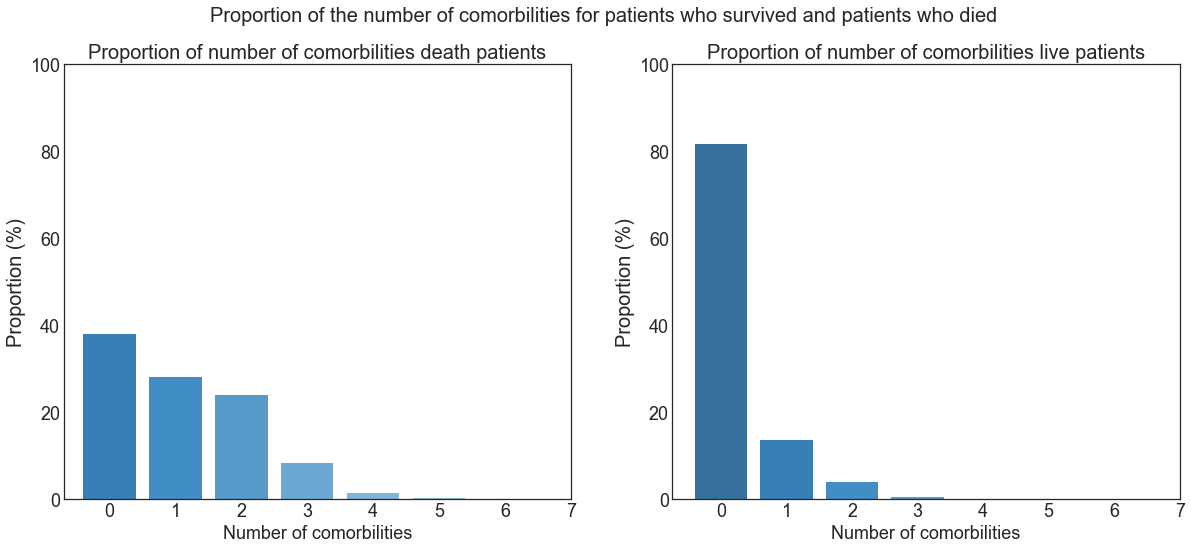

In [599]:
plt.style.use("seaborn-white")

# Create the figure and the axis
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Graphics
ax[0].bar(comor_pro2_death.index, comor_pro2_death["Percentage"], color = sns.color_palette("Blues_d", 10))
ax[1].bar(comor_pro2_live.index, comor_pro2_live["Percentage"], color = sns.color_palette("Blues_d", 10))

# Title, labels, ticks for ax[0]
ax[0].set_ylabel("Proportion (%)", fontsize = 20)
ax[0].set_xlabel("Number of comorbilities", fontsize = 18)
ax[0].set_xticks(ticks = np.arange(0,8), labels = np.arange(0,8), fontsize = 18)
ax[0].set_yticks(ticks = np.arange(0,120, 20), labels = np.arange(0,120, 20), fontsize = 18)
ax[0].set_title("Proportion of number of comorbilities death patients", fontsize = 20)
ax[0].set_ylim((0, 100))

# Title, labels, ticks for ax[1]
ax[1].set_ylabel("Proportion (%)", fontsize = 20)
ax[1].set_xlabel("Number of comorbilities", fontsize = 18)
ax[1].set_xticks(ticks = np.arange(0,8), labels = np.arange(0,8), fontsize = 18)
ax[1].set_yticks(ticks = np.arange(0,120, 20), labels = np.arange(0,120, 20), fontsize = 18)
ax[1].set_title("Proportion of number of comorbilities live patients", fontsize = 20)
ax[1].set_ylim((0, 100))

plt.suptitle("Proportion of the number of comorbilities for patients who survived and patients who died", fontsize = 20)

plt.show()

Patients who died had more comorbidities

<a id='4.E'></a>

## 4.E Delta_DeathReg

Outlier removal

In [600]:
iqr_delta_death = iqr(df_covid_death["Delta_DeathReg"])
low_thres_delta_death = np.quantile(df_covid_death["Delta_DeathReg"], 0.25) - (1.5 * iqr_delta_death)
high_thres_delta_death = np.quantile(df_covid_death["Delta_DeathReg"], 0.75) + (1.5 * iqr_delta_death)

In [601]:
Delta_DeathReg = df_covid_death[(df_covid_death["Delta_DeathReg"] >= low_thres_delta_death) & (df_covid_death["Delta_DeathReg"] <= high_thres_delta_death)]

In [602]:
Delta_DeathReg["Delta_DeathReg"].median()

13.0

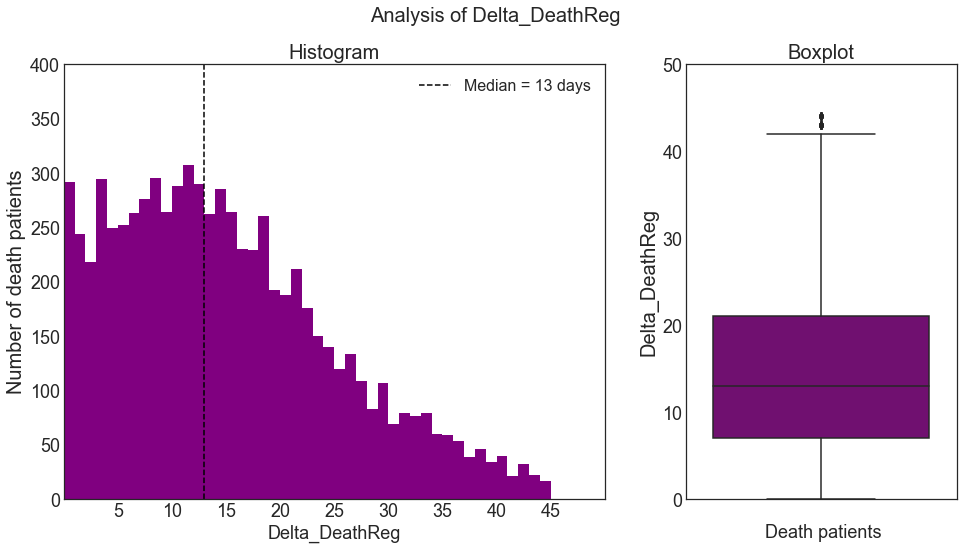

In [603]:
plt.style.use("seaborn-white")
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(16)
 
spec = gridspec.GridSpec(ncols = 2, nrows = 1, width_ratios = [2, 1], wspace = 0.2, hspace = 0.1)

ax0 = fig.add_subplot(spec[0])
ax1 = fig.add_subplot(spec[1])

# Graphics
ax0.hist(Delta_DeathReg["Delta_DeathReg"], color = "purple", bins = np.arange(0, 50, 1))
ax1 = sns.boxplot(x = "Evolution", y = "Delta_DeathReg", data = Delta_DeathReg, color = "purple")

# Title, labels, ticks for ax[0]
ax0.set_ylabel("Number of death patients", fontsize = 20)
ax0.set_xlabel("Delta_DeathReg", fontsize = 18)
ax0.set_xticks(ticks = np.arange(5, 50, 5), labels = np.arange(5, 50, 5), fontsize = 18)
ax0.set_yticks(ticks = np.arange(0, 450, 50), labels = np.arange(0, 450, 50), fontsize = 18)
ax0.set_ylim((0, 400))
ax0.set_xlim((0, 50))
ax0.set_title("Histogram", fontsize = 20)
ax0.axvline(x = Delta_DeathReg["Delta_DeathReg"].median(), color = "black", linestyle = "--", label = "Median = 13 days")
ax0.legend(fontsize = 16)

# Title, labels, ticks for ax[1]
ax1.set_ylabel("Delta_DeathReg", fontsize = 20)
ax1.set_xlabel("\n Death patients", fontsize = 18)
ax1.set_xticks([])
ax1.set_yticks(ticks = np.arange(0, 60, 10), labels = np.arange(0, 60, 10), fontsize = 18)
ax1.set_ylim((0, 50))
ax1.set_title("Boxplot", fontsize = 20)

plt.suptitle("Analysis of Delta_DeathReg", fontsize = 20)

plt.show()

<a id='4.F'></a>

## 4.F Hospitalized

In [604]:
hospitalized_null = df_covid["Hospitalized"].isna().sum() / df_covid.shape[0] * 100
print(f"Percentage of nulls in 'Hospitalized column': {round(hospitalized_null, 2)}%")

Percentage of nulls in 'Hospitalized column': 53.62%


In [605]:
hospitalized = df_covid.dropna(subset = "Hospitalized")

In [606]:
hospitalized_yes = hospitalized[hospitalized["Hospitalized"] == "Yes"]

In [607]:
hospitalized_yes.shape

(5955, 34)

In [608]:
hospitalized_yes_pct = round((hospitalized_yes.shape[0] / hospitalized.shape[0] * 100), 2)
print(f"Percentage of patients hospitalized: {hospitalized_yes_pct}%.")

Percentage of patients hospitalized: 3.34%.


In [609]:
mask_hospitalized_cured = hospitalized_yes["Evolution"] == "Cured"
mask_hospitalized_death = hospitalized_yes["Evolution"] == "Death"

hospitalized_cured = round((hospitalized_yes[mask_hospitalized_cured].shape[0] / hospitalized_yes.shape[0] * 100), 2)
hospitalized_death = round((hospitalized_yes[mask_hospitalized_death].shape[0] / hospitalized_yes.shape[0] * 100), 2)

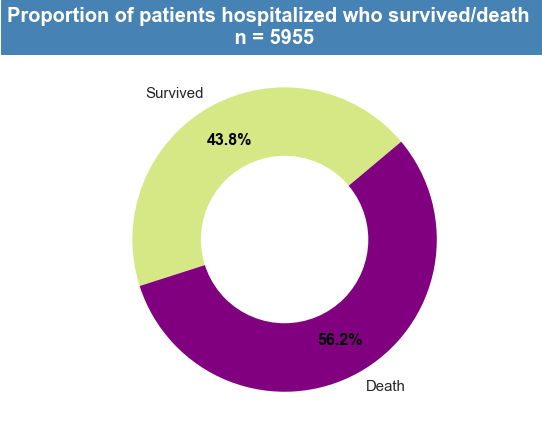

In [610]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
  
# Creating dataset
data = [hospitalized_cured, hospitalized_death]
labels = ["Survived", "Death"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("#d6e885", "purple"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of patients hospitalized who survived/death \n n = 5955", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

<a id='4.G'></a>

## 4.G Pregnant

In [611]:
pregnant_null = df_covid["Pregnant"].isna().sum() / df_covid.shape[0] * 100
print(f"Percentage of nulls in 'Pregnant' column: {round(pregnant_null, 2)}%")

Percentage of nulls in 'Pregnant' column: 46.41%


In [612]:
pregnant = df_covid.dropna(subset = "Pregnant")

In [613]:
pregnant_yes = pregnant[pregnant["Pregnant"] == "Yes"]

In [614]:
pregnant_yes.shape

(2059, 34)

In [615]:
pregnant_yes_pct = round((pregnant_yes.shape[0] / pregnant.shape[0] * 100), 2)
print(f"Percentage of patients pregnant: {pregnant_yes_pct}%.")

Percentage of patients pregnant: 1.0%.


In [616]:
mask_pregnant_cured = pregnant_yes["Evolution"] == "Cured"
mask_pregnant_death = pregnant_yes["Evolution"] == "Death"

pregnant_cured = round((pregnant_yes[mask_pregnant_cured].shape[0] / pregnant_yes.shape[0] * 100), 2)
pregnant_death = round((pregnant_yes[mask_pregnant_death].shape[0] / pregnant_yes.shape[0] * 100), 2)

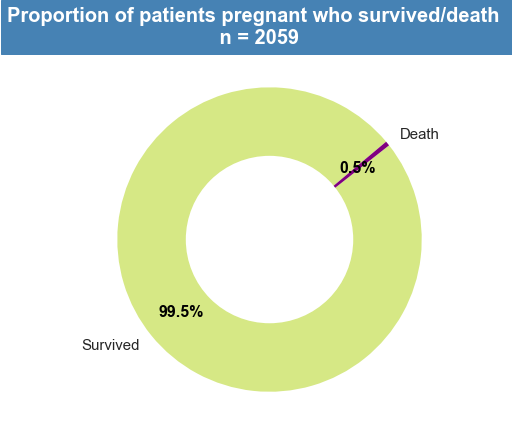

In [617]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
  
# Creating dataset
data = [pregnant_cured, pregnant_death]
labels = ["Survived", "Death"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("#d6e885", "purple"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of patients pregnant who survived/death \n n = 2059", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

Hospitalized pregnant sub analysis

In [618]:
hospitalized_yes.head(2)

,Register_date,Diagnosis_date,Death_date,Result_PCR,Result_RapidTest,Classification,Hospitalized,Evolution,Gender,Notification_age,...,Comorbidity_cardiac,Comorbidity_renal,Comorbidity_diabetes,Comorbidity_smoking,Comorbidity_obesity,Delta_RegDiag,Delta_DeathReg,Age,n_comor,n_symp
17,2021-11-08,2021-11-04,2021-11-09,NaN,Positive,Confirmed,Yes,Death,Masculine,"52 anos, 6 meses, 30 dias",...,No,No,No,No,No,4,1.0,52.0,0,3
137,2021-11-05,2021-11-01,NaT,NaN,Positive,Confirmed,Yes,Cured,Femenine,"87 anos, 9 meses, 29 dias",...,Yes,No,No,No,No,4,NaN,87.0,1,1


In [619]:
hospitalized_yes.shape

(5955, 34)

Pregnant women who were hospitalized

In [620]:
mask_pregnant_hospitalized  = hospitalized_yes["Pregnant"] == "Yes"

pregnant_hospitalized = hospitalized_yes[mask_pregnant_hospitalized]

In [621]:
pregnant_hospitalized.shape

(16, 34)

In [622]:
mask_pregnant_hospitalized_cured = pregnant_hospitalized["Evolution"] == "Cured"
mask_pregnant_hospitalized_death = pregnant_hospitalized["Evolution"] == "Death"

pregnant_hospitalized_cured = round((pregnant_hospitalized[mask_pregnant_hospitalized_cured].shape[0] / pregnant_hospitalized.shape[0] * 100), 2)
pregnant_hospitalized_death = round((pregnant_hospitalized[mask_pregnant_hospitalized_death].shape[0] / pregnant_hospitalized.shape[0] * 100), 2)

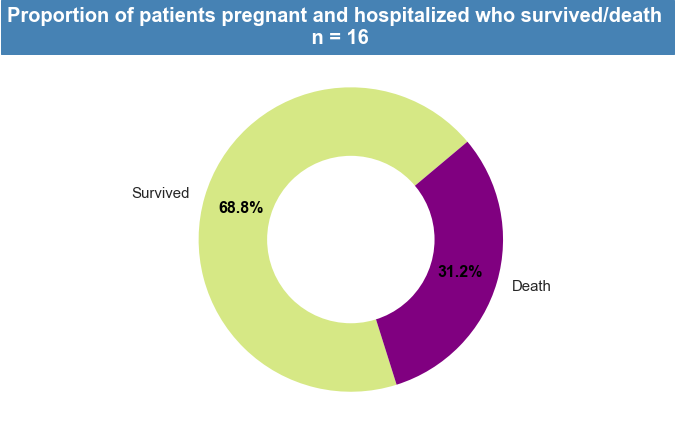

In [623]:
# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
  
# Creating dataset
data = [pregnant_hospitalized_cured, pregnant_hospitalized_death]
labels = ["Survived", "Death"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("#d6e885", "purple"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize': 16})
plt.title("Proportion of patients pregnant and hospitalized who survived/death \n n = 16", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

<a id='4.H'></a>

## 4.G Cases by date

In [718]:
dates = df_covid.copy()

In [719]:
dates["year"] = dates["Register_date"].dt.year
dates["month"] = dates["Register_date"].dt.month

In [720]:
dates_group = dates.groupby(["year", "month"])["Classification"].count()
dates_group

year  month
2020  3           15
      4         2764
      5        11253
      6        17709
      7        20053
      8        12594
      9        11304
      10       18194
      11       30876
      12       34714
2021  1        28114
      2        19943
      3        41685
      4        32041
      5        27840
      6        20425
      7        13497
      8        12607
      9        15806
      10       12293
      11         771
Name: Classification, dtype: int64

In [721]:
dates_ticks = np.arange(0, 21, 1)
dates_labels = ["03-20", "04-20", "05-20", "06-20", "07-20", "08-20", "09-20", "10-20", "11-20", "12-20", 
          "01-21", "02-21", "03-21", "04-21", "05-21", "06-21", "07-21", "08-21", "09-21", "10-21", "11-21"]

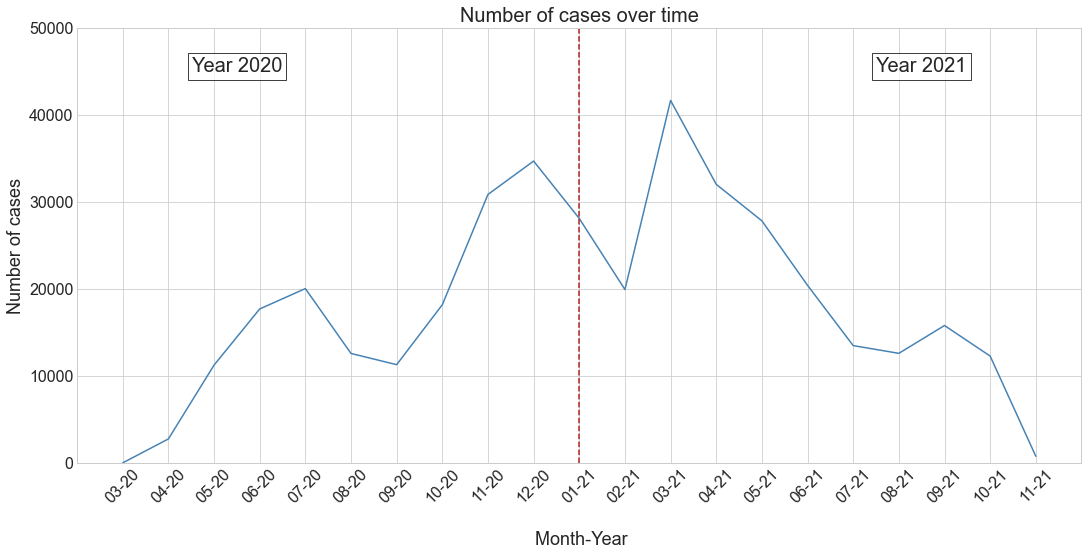

In [736]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 10))
plt.style.use("seaborn-whitegrid")

# Graphic
dates_group.plot(color = "steelblue", figsize = (18, 8))

# Title, labels, ticks, etc
plt.xlabel("\n Month-Year", fontsize = 18)
plt.xticks(ticks = dates_ticks, labels = dates_labels, fontsize = 16, rotation = 45)
plt.ylabel("Number of cases", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 50000)
plt.title("Number of cases over time", fontsize = 20)

ax.axvline(x = 10, color = "firebrick", linestyle = "--", label = "Mean")
ax.text(2.5, 45000, "Year 2020", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))
ax.text(17.5, 45000, "Year 2021", ha = "center", fontsize = 20, bbox = dict(facecolor = "white", alpha = .75))

plt.show()

---

---

In [677]:
prueba = df_covid.copy()
prueba["month"] = prueba["Register_date"].dt.month
prueba_2020 = prueba[prueba["Register_date"].dt.year == 2020]
prueba_2021 = prueba[prueba["Register_date"].dt.year == 2021]

In [678]:
asd = prueba.groupby("month")["Classification"].count()
asd_2020 = prueba_2020.groupby("month")["Classification"].count()
asd_2021 = prueba_2021.groupby("month")["Classification"].count()

In [651]:
names_month_abrev = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

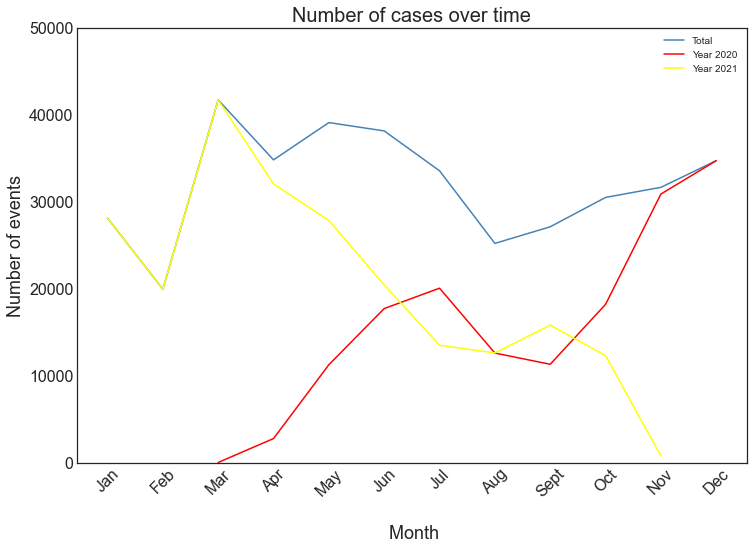

In [654]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 10))

plt.style.use("seaborn-white")

asd.plot(color = "steelblue", figsize = (12, 8), label = "Total")
asd_2020.plot(color = "red", figsize = (12, 8), label = "Year 2020")
asd_2021.plot(color = "yellow", figsize = (12, 8), label = "Year 2021")

plt.title("Number of cases over time", fontsize = 20)
plt.xticks(ticks = range(1,13,1), labels = names_month_abrev, fontsize = 16, rotation = 45)
plt.xlabel("\n Month", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 50000)
plt.ylabel("Number of events", fontsize = 18)

plt.legend()

plt.show()

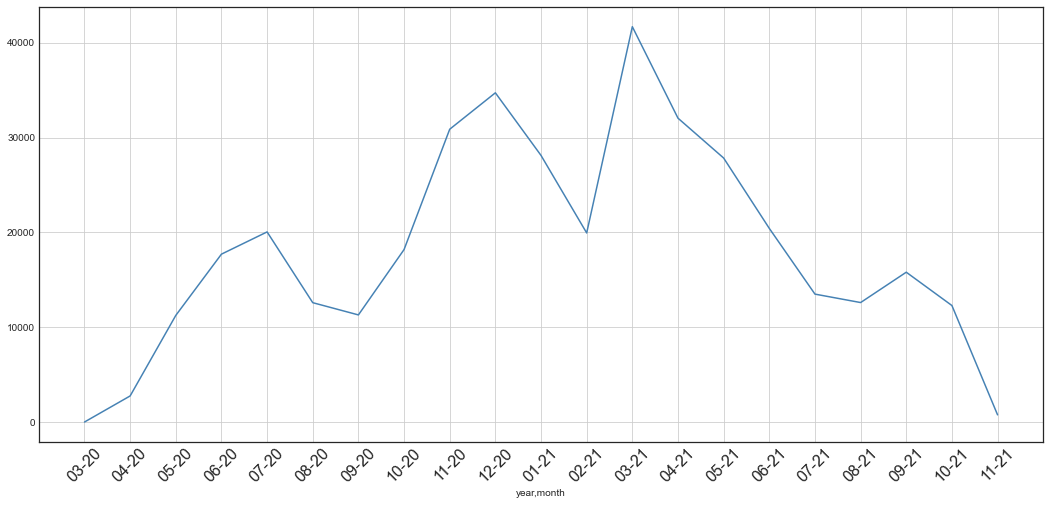

In [717]:
# Create the figure and the axis
fig, ax = plt.subplots(figsize = (8, 10))

plt.style.use("seaborn-whitegrid")

asd2.plot(color = "steelblue", figsize = (18, 8))
np.arange(-2.5, 25, 2.5)
plt.xticks(ticks = ticks, labels = labels, fontsize = 16, rotation = 45)

"""
plt.title("Number of cases over time", fontsize = 20)
plt.xticks(ticks = range(1,13,1), labels = names_month_abrev, fontsize = 16, rotation = 45)
plt.xlabel("\n Month", fontsize = 18)
plt.yticks(fontsize = 16)
plt.ylim(0, 50000)
plt.ylabel("Number of events", fontsize = 18)

plt.legend()
"""
plt.show()

In [ ]:
asd2 = prueba.groupby(prueba["Register_date"].dt.year)["Classification"].count()

---

In [274]:
df.columns

Index(['Register_date', 'Diagnosis_date', 'Death_date', 'Result_PCR',
       'Result_RapidTest', 'Classification', 'Hospitalized', 'Evolution',
       'Gender', 'Notification_age', 'Range_age', 'Race', 'Municipality',
       'Neighborhood', 'Pregnant', 'Disabled', 'Fever', 'Breath_difficulty',
       'Cough', 'Rhinitis', 'Throat_pain', 'Diarrhea', 'Headache',
       'Comorbidity_pulmonary', 'Comorbidity_cardiac', 'Comorbidity_renal',
       'Comorbidity_diabetes', 'Comorbidity_smoking', 'Comorbidity_obesity',
       'Delta_RegDiag', 'Delta_DeathReg', 'Age', 'n_comor', 'n_symp'],
      dtype='object')

In [ ]:
# analizamos un poco mas las columnas de las categorias que elegimos. Para esto vamos a mirar porcentajes de cada valor unico para
# realizar un ultimo filtrado de nuestro data set.

def categoricos2(df):
    for x in range(df.shape[1]):
        if "Data" in df.columns[x]:
            pass
        else:
            print(df.columns[x], "\n", df[df.columns[x]].unique(), "\n",
                  [round(((df[df.columns[x]] == df[df.columns[x]].unique()[i]).sum())/ df.shape[0] * 100,2) for i in range(len(df[df.columns[x]].unique()))], "\n")

In [ ]:
# nos enfocamos en los casos confirmados y solo analizaremos casos curados o mertes por covid.
mask_caso_confirmado=(df.Classificacao=='Confirmados')
mask_cura_muerte=(df.Evolucao=='Óbito pelo COVID-19')|(df.Evolucao=='Cura')
mask_caso_cerrados=(df.StatusNotificacao=='Encerrado')
mask_anios_neg = (df.anios != -1)
masks= (mask_caso_confirmado & mask_cura_muerte & mask_caso_cerrados & mask_anios_neg)

In [ ]:
# generamos un dataframe solo con los datos que nos interesan.
df_clean = df.loc[masks, columns]

In [ ]:
categoricos2(df_clean)

Classificacao 
 ['Confirmados'] 
 [100.0] 

Evolucao 
 ['Cura' 'Óbito pelo COVID-19'] 
 [97.84, 2.16] 

anios 
 [ 39  33  63  38  36  77  71  53  58  67  25  26  31  40  43  47  24   2
  16  41  45  32  62  37  15  50  59  22  68  66  20  61   8  46  49  42
  30  94   3   1  54  29  56  27  17  82  11  23  85  60  44  52   4  19
  18  10  34  74  76   6  13  72  48  35  64  57  80  28  75  12  69  91
  55   9   0  51  14  73  87  81  90  83  70  89  65  21  79   7  86   5
  88  78  84  92  93 100  96  95  99 101  98  97 102 105 117 103 110 111
 104 106 108 107 109] 
 [2.48, 2.36, 0.96, 2.51, 2.34, 0.31, 0.52, 1.47, 1.23, 0.73, 1.9, 1.95, 2.21, 2.33, 2.12, 1.71, 1.83, 0.31, 0.78, 2.26, 1.88, 2.36, 1.0, 2.4, 0.68, 1.57, 1.13, 1.64, 0.73, 0.83, 1.41, 1.01, 0.33, 1.8, 1.64, 2.24, 2.09, 0.03, 0.29, 0.37, 1.42, 2.07, 1.34, 1.97, 0.93, 0.19, 0.42, 1.77, 0.15, 1.06, 1.98, 1.51, 0.24, 1.23, 1.05, 0.39, 2.43, 0.39, 0.32, 0.29, 0.5, 0.48, 1.69, 2.4, 0.87, 1.29, 0.23, 1.98, 0.36, 0.44, 0.63, 0.07,

In [ ]:
#limpiamos un poco mas el Dataset filtrando datos que no suman informacion.

mask_Febre = df_clean['Febre'] != '-'
mask_Resp = df_clean['DificuldadeRespiratoria'] != '-'
mask_Tos = df_clean['Tosse'] != '-'
mask_Coriza = df_clean['Coriza'] != '-'
mask_Garganta = df_clean['DorGarganta'] != '-'
mask_Diarreia = df_clean['Diarreia'] != '-'
mask_Cefaleia = df_clean['Cefaleia'] != '-'
mask_Deficiencia = df_clean['PossuiDeficiencia'] != 'Não Informado'
mask_Pulmao = df_clean['ComorbidadePulmao'] != '-'
mask_Cardio = df_clean['ComorbidadeCardio'] != '-'
mask_Renal = df_clean['ComorbidadeRenal'] != '-'
mask_Diabetes = df_clean['ComorbidadeDiabetes'] != '-'
mask_Tabagismo = df_clean['ComorbidadeTabagismo'] != '-'
mask_Obesidade = df_clean['ComorbidadeObesidade'] != '-'
mask_Gestante2 = df_clean['Gestante'] != 'Ignorado'
mask_Sexo = df_clean['Sexo'] != 'I'

mask_total = mask_Febre & mask_Resp & mask_Tos & mask_Coriza & mask_Garganta & mask_Diarreia & mask_Cefaleia & mask_Deficiencia & mask_Pulmao & mask_Cardio & mask_Renal & mask_Diabetes & mask_Tabagismo & mask_Obesidade & mask_Gestante2 & mask_Sexo


In [ ]:
df_clean1 = df_clean[mask_total]
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 591002 entries, 2021-11-11 to 2020-02-29
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Classificacao            591002 non-null  object
 1   Evolucao                 591002 non-null  object
 2   anios                    591002 non-null  int32 
 3   FaixaEtaria              591002 non-null  object
 4   Sexo                     591002 non-null  object
 5   RacaCor                  591002 non-null  object
 6   Gestante                 591002 non-null  object
 7   Febre                    591002 non-null  object
 8   DificuldadeRespiratoria  591002 non-null  object
 9   Tosse                    591002 non-null  object
 10  Coriza                   591002 non-null  object
 11  DorGarganta              591002 non-null  object
 12  Diarreia                 591002 non-null  object
 13  Cefaleia                 591002 non-null  object
 14  PossuiDefici

In [ ]:
#creamos las dummies con one hot encoder
categoricals = ['Evolucao',
           'FaixaEtaria', 
           'Sexo',
           'RacaCor', 
           'Gestante', 
           'Febre',
           'DificuldadeRespiratoria', 
           'Tosse', 
           'Coriza', 
           'DorGarganta', 
           'Diarreia',
           'Cefaleia',
           'ComorbidadePulmao', 
           'ComorbidadeCardio',
           'ComorbidadeRenal', 
           'ComorbidadeDiabetes', 
           'ComorbidadeTabagismo',
           'ComorbidadeObesidade']

enc = OneHotEncoder(drop='first')
X = df_clean1[categoricals]
enc.fit(X)
enc.categories_

dummies = enc.transform(X).toarray()
dummies_data = pd.DataFrame(dummies)

col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals)) ]

col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]

dummies_data.columns = col_names_drop_first

In [ ]:
#Ahora estandarizamos la feature numérica:

numericals = ['anios']

X = df_clean1[numericals]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,anios_std
0,-0.071039
1,-0.413751
2,1.299810
3,-0.128158
4,-0.242395
...,...
590997,0.671504
590998,0.043198
590999,-0.299514
591000,0.100317


In [ ]:
df_clean2 = pd.concat([dummies_data,std_df], axis = 1)

In [ ]:
df_clean2.shape

(591002, 36)

In [ ]:
df_clean2.head()

,Evolucao_Óbito pelo COVID-19,FaixaEtaria_05 a 9 anos,FaixaEtaria_10 a 19 anos,FaixaEtaria_20 a 29 anos,FaixaEtaria_30 a 39 anos,FaixaEtaria_40 a 49 anos,FaixaEtaria_50 a 59 anos,FaixaEtaria_60 a 69 anos,FaixaEtaria_70 a 79 anos,FaixaEtaria_80 a 89 anos,...,DorGarganta_Sim,Diarreia_Sim,Cefaleia_Sim,ComorbidadePulmao_Sim,ComorbidadeCardio_Sim,ComorbidadeRenal_Sim,ComorbidadeDiabetes_Sim,ComorbidadeTabagismo_Sim,ComorbidadeObesidade_Sim,anios_std
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.071039
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.413751
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.299810
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.128158
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.242395


In [ ]:
# Creamos un archivo csv con el dataset limpio definitivo
df_clean2.to_csv("Covid_clean.csv")

In [ ]:
# creamos un segundo DF agregando tambien la columna si estuvo internado, ya que podria ser util para un segundo enfoque
# de nuestro problema

columns2 = ['Classificacao', 
           'Evolucao',
            'anios',
           'FaixaEtaria', 
           'Sexo',
           'RacaCor', 
           'Gestante', 
           'Febre',
           'DificuldadeRespiratoria', 
           'Tosse', 
           'Coriza', 
           'DorGarganta', 
           'Diarreia',
           'Cefaleia', 
           'FicouInternado',
           'PossuiDeficiencia',
           'ComorbidadePulmao', 
           'ComorbidadeCardio',
           'ComorbidadeRenal', 
           'ComorbidadeDiabetes', 
           'ComorbidadeTabagismo',
           'ComorbidadeObesidade']

In [ ]:
# creamos un nuevo df limpio y tambien filtramos la columna ficou internado sacano los valores que no tienen informacion:
mask_Internado = (df['FicouInternado'] != 'Não Informado') & (df['FicouInternado'] != 'Ignorado')
masks2 = masks & mask_Internado
df_clean3 = df.loc[masks2, columns2]

In [ ]:
categoricos2(df_clean3)

Classificacao 
 ['Confirmados'] 
 [100.0] 

Evolucao 
 ['Cura' 'Óbito pelo COVID-19'] 
 [96.46, 3.54] 

anios 
 [ 63  38  77  71  58  67  25  26  31  39  36  16  37  15  50  22  66  61
  42  30  94   3  20  59  32  40  52  62   4  19  47  18  10  46  33  29
  23  17  44  72  48  43  85  80   2  53  35  41  69  75  91  49  60  45
   6  56  51  87  74  57  83  13  64  89  24  28  11  34  21  65  12  79
  27  82   9   1  55  68   8  73  14  86   7  70  88   5  81  84  78   0
  54  93  92  96  76  90  95 101  99  97  98 100 105 110 111 102 103 106
 108 104 107 109] 
 [1.0, 2.43, 0.36, 0.57, 1.28, 0.75, 1.86, 1.96, 2.12, 2.45, 2.29, 0.7, 2.34, 0.62, 1.61, 1.61, 0.86, 1.02, 2.23, 2.07, 0.04, 0.28, 1.36, 1.16, 2.28, 2.3, 1.52, 1.0, 0.23, 1.18, 1.72, 0.96, 0.35, 1.8, 2.33, 2.04, 1.72, 0.86, 1.99, 0.52, 1.73, 2.07, 0.18, 0.27, 0.31, 1.49, 2.3, 2.2, 0.7, 0.4, 0.08, 1.67, 1.1, 1.94, 0.27, 1.37, 1.6, 0.14, 0.44, 1.29, 0.22, 0.46, 0.89, 0.12, 1.81, 1.95, 0.38, 2.38, 1.58, 0.87, 0.42, 0.31, 1.94, 0.

In [ ]:
#Hacemos nuevamente el ultimo filtrado.

mask_Febre2 = df_clean3['Febre'] != '-'
mask_Resp2 = df_clean3['DificuldadeRespiratoria'] != '-'
mask_Tos2 = df_clean3['Tosse'] != '-'
mask_Coriza2 = df_clean3['Coriza'] != '-'
mask_Garganta2 = df_clean3['DorGarganta'] != '-'
mask_Diarreia2 = df_clean3['Diarreia'] != '-'
mask_Cefaleia2 = df_clean3['Cefaleia'] != '-'
mask_Deficiencia2 = df_clean3['PossuiDeficiencia'] != 'Não Informado'
mask_Pulmao2 = df_clean3['ComorbidadePulmao'] != '-'
mask_Cardio2 = df_clean3['ComorbidadeCardio'] != '-'
mask_Renal2 = df_clean3['ComorbidadeRenal'] != '-'
mask_Diabetes2 = df_clean3['ComorbidadeDiabetes'] != '-'
mask_Tabagismo2 = df_clean3['ComorbidadeTabagismo'] != '-'
mask_Obesidade2 = df_clean3['ComorbidadeObesidade'] != '-'
mask_Gestante22 = df_clean3['Gestante'] != 'Ignorado'
mask_Sexo2 = df_clean3['Sexo'] != 'I'

mask_total2 = mask_Febre2 & mask_Resp2 & mask_Tos2 & mask_Coriza2 & mask_Garganta2 & mask_Diarreia2 & mask_Cefaleia2 & mask_Deficiencia2 & mask_Pulmao2 & mask_Cardio2 & mask_Renal2 & mask_Diabetes2 & mask_Tabagismo2 & mask_Obesidade2 & mask_Gestante22 & mask_Sexo2


In [ ]:
df_clean4 = df_clean3[mask_total2]
df_clean4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263432 entries, 2021-11-10 to 2020-03-06
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Classificacao            263432 non-null  object
 1   Evolucao                 263432 non-null  object
 2   anios                    263432 non-null  int32 
 3   FaixaEtaria              263432 non-null  object
 4   Sexo                     263432 non-null  object
 5   RacaCor                  263432 non-null  object
 6   Gestante                 263432 non-null  object
 7   Febre                    263432 non-null  object
 8   DificuldadeRespiratoria  263432 non-null  object
 9   Tosse                    263432 non-null  object
 10  Coriza                   263432 non-null  object
 11  DorGarganta              263432 non-null  object
 12  Diarreia                 263432 non-null  object
 13  Cefaleia                 263432 non-null  object
 14  FicouInterna

In [ ]:
#creamos las dummies con one hot encoder
categoricals2 = ['Evolucao',
           'FaixaEtaria', 
           'Sexo',
           'RacaCor', 
           'Gestante', 
           'Febre',
           'DificuldadeRespiratoria', 
           'Tosse', 
           'Coriza', 
           'DorGarganta', 
           'Diarreia',
           'Cefaleia',
           'FicouInternado',
           'ComorbidadePulmao', 
           'ComorbidadeCardio',
           'ComorbidadeRenal', 
           'ComorbidadeDiabetes', 
           'ComorbidadeTabagismo',
           'ComorbidadeObesidade']

enc = OneHotEncoder(drop='first')
X = df_clean4[categoricals2]
enc.fit(X)
enc.categories_

dummies = enc.transform(X).toarray()
dummies_data = pd.DataFrame(dummies)

col_names = [categoricals2[i] + '_' + enc.categories_[i] for i in range(len(categoricals2))]

col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]

dummies_data.columns = col_names_drop_first

In [ ]:
#estandarizamos denuevo la feature numérica:

numericals2 = ['anios']

X = df_clean4[numericals2]

scaler = StandardScaler()
scaler.fit(X)

std_numerical_data = scaler.transform(X)
std_df = pd.DataFrame(std_numerical_data)
std_df.columns = [i + '_std' for i in numericals]
std_df

,anios_std
0,1.235097
1,-0.165422
2,2.019388
3,1.683263
4,0.954993
...,...
263427,1.235097
263428,0.898973
263429,2.075409
263430,0.674890


In [ ]:
df_clean5 = pd.concat([dummies_data,std_df], axis = 1)

In [ ]:
df_clean5.shape

(263432, 37)

In [ ]:
df_clean5.to_csv("Covid_clean2.csv")

In [11]:
df_covid.iloc[:2, 15:30]

,IdadeNaDataNotificacao,Sexo,RacaCor,Escolaridade,Gestante,Febre,DificuldadeRespiratoria,Tosse,Coriza,DorGarganta,Diarreia,Cefaleia,ComorbidadePulmao,ComorbidadeCardio,ComorbidadeRenal
DataNotificacao,,,,,,,,,,,,,,,
2021-11-11,"19 anos, 8 meses, 21 dias",M,Ignorado,Ignorado,Não se aplica,Não,Não,Sim,Sim,Não,Não,Não,Não,Não,Não
2021-11-11,"63 anos, 11 meses, 16 dias",F,Branca,Educação superior completa,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não


In [12]:
df_covid.iloc[:2, 30:]

,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
DataNotificacao,,,,,,,,,,,,,,
2021-11-11,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2021-11-11,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


In [17]:
df.iloc[:5, 30:44]

,ComorbidadeDiabetes,ComorbidadeTabagismo,ComorbidadeObesidade,FicouInternado,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
DataNotificacao,,,,,,,,,,,,,,
2021-11-11,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2021-11-11,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
2021-11-11,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2021-11-11,Não,Não,Não,Não,Não,Não,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
2021-11-11,Não,Não,Não,Não,Não,Não,Sim,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado


In [ ]:
# creamos una funcion para visualizar los datos categoricos de las columnas, las que son de fechas no las consideramos.

def categoricos1(df):
    for x in range(df.shape[1]):
        if "Data" in df.columns[x]:
            pass
        else:
            print(df.columns[x], "\n", df[df.columns[x]].unique(), "\n")

In [ ]:
categoricos1(df)

Classificacao 
 ['Suspeito' 'Descartados' 'Confirmados'] 

Evolucao 
 ['-' 'Ignorado' 'Cura' 'Óbito por outras causas' 'Óbito pelo COVID-19'] 

CriterioConfirmacao 
 ['-' 'Laboratorial' 'Clinico' 'Clinico Epdemiologico'] 

StatusNotificacao 
 ['Em Aberto' 'Encerrado'] 

Municipio 
 ['SERRA' 'VITORIA' 'VILA VELHA' ... 'MONTE ALEGRE DE SERGIPE'
 'FARIA LEMOS' 'VOLTA GRANDE'] 

Bairro 
 ['VALPARAÍSO' 'PRAIA DO CANTO' 'ARIBIRÍ' ... 'LOTEAMENTO SILVANA'
 'LOTEAMENTO GRANDE VITÓRIA' 'LOTEAMENTO DONA LÉA'] 

FaixaEtaria 
 ['10 a 19 anos' '60 a 69 anos' '30 a 39 anos' '0 a 4 anos' '40 a 49 anos'
 '20 a 29 anos' '70 a 79 anos' '50 a 59 anos' '80 a 89 anos' '05 a 9 anos'
 '90 anos ou mais' '-'] 

Sexo 
 ['M' 'F' 'I'] 

RacaCor 
 ['Ignorado' 'Branca' 'Parda' 'Preta' 'Amarela' 'Indigena'] 

Escolaridade 
 ['Ignorado' 'Educação superior completa'
 'Ensino médio completo (antigo colegial ou 2º grau ) ' 'Não se aplica'
 'Ensino médio incompleto (antigo colegial ou 2º grau )'
 'Ensino fundamental comp